# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [65]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [66]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
      for r, row in enumerate(X):
        y_in = np.dot(row, w)
        y = percep_step(y_in, th)
        if y != target[r]:
          stop = False
          w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
          if verbose:
            print('Bobot:', w)
          if draw:
            plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [67]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [68]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [69]:
import pandas as pd

#upload data

data = pd.read_csv('data.csv')
print(data)

            x         y         z            Activity
0    0.288585 -0.020294 -0.132905            STANDING
1    0.278419 -0.016411 -0.123520            STANDING
2    0.279653 -0.019467 -0.113462            STANDING
3    0.279174 -0.026201 -0.123283            STANDING
4    0.276629 -0.016570 -0.115362            STANDING
..        ...       ...       ...                 ...
795  0.356419  0.001897 -0.094958             WALKING
796  0.342112 -0.044194 -0.109427             WALKING
797  0.263759  0.047500 -0.043263  WALKING_DOWNSTAIRS
798  0.278577 -0.002049 -0.111989  WALKING_DOWNSTAIRS
799  0.285249 -0.027630 -0.125218  WALKING_DOWNSTAIRS

[800 rows x 4 columns]


Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

Hapuslah kelas hingga hanya nyisakan kelas: WALKING_DOWNSTAIRS dan WALKING_UPSTAIRS

In [70]:
data = data[data['Activity'].isin(['WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS'])] #Praktikan menghapus kelas kelas yang tidak digunakan

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = data[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data['Activity'].to_numpy()
c = {'WALKING_DOWNSTAIRS': -1, 'WALKING_UPSTAIRS': 1} # Praktikan mengubah kedua kelas target menjadi -1 dan 1, kelas1: WALKING_DOWNSTAIRS kelas2: WALKING_UPSTAIRS
y = [c[i] for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=10, test_size=.3)


Epoch 1
Bobot: [-0.0001, -8.332063676054823e-05, -5.081888922441285e-05, -8.562034930442472e-05]


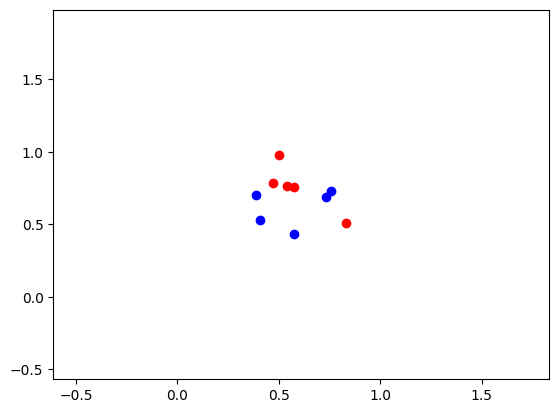

Bobot: [0.0, -7.504682372267484e-06, 2.1892251676247937e-05, -5.334265409304167e-05]


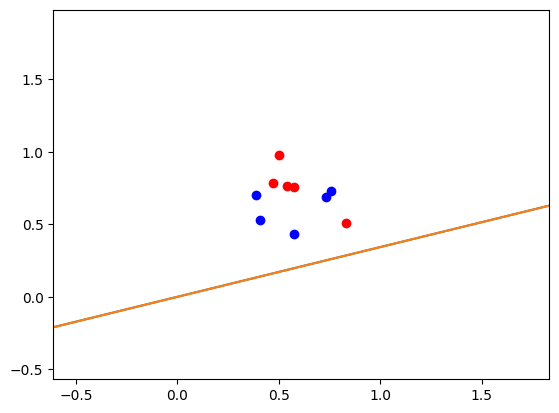

Bobot: [0.0001, 6.563509802929111e-05, 9.102224755653545e-05, 5.439851695350103e-06]


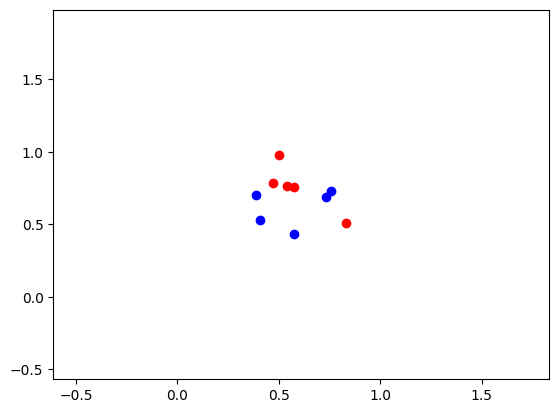

Bobot: [0.0, 8.151916550153086e-06, 1.5211046909043179e-05, -2.249239826019678e-05]


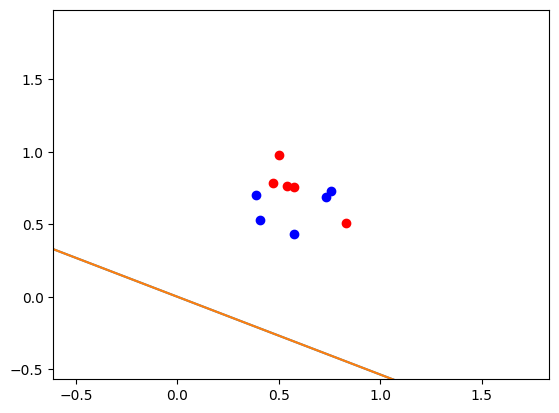

Bobot: [-0.0001, -4.16957424544117e-05, -8.271095135238916e-05, -9.365831210237528e-05]


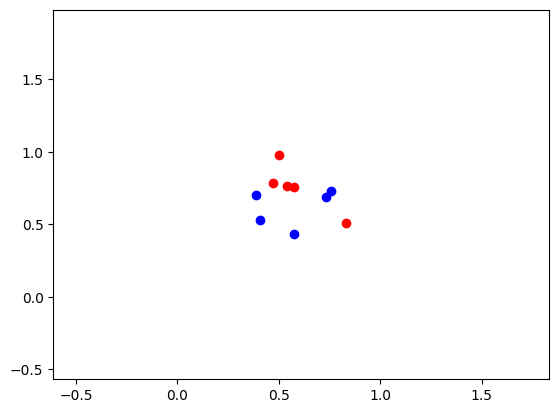


Epoch 2
Bobot: [0.0, 3.4120211933869046e-05, -9.999810451728376e-06, -6.138061689099223e-05]


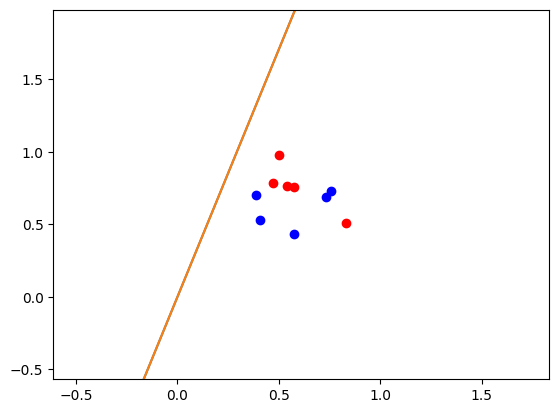

Bobot: [0.0001, 0.00010725999233542764, 5.913018542855913e-05, -2.598111102600452e-06]


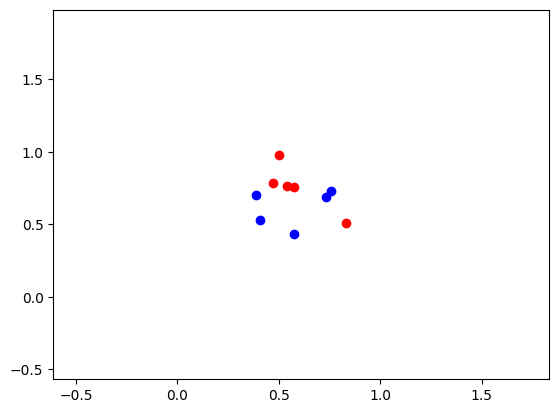

Bobot: [0.0, 4.9776810856289616e-05, -1.668101521893314e-05, -3.0530361058147336e-05]


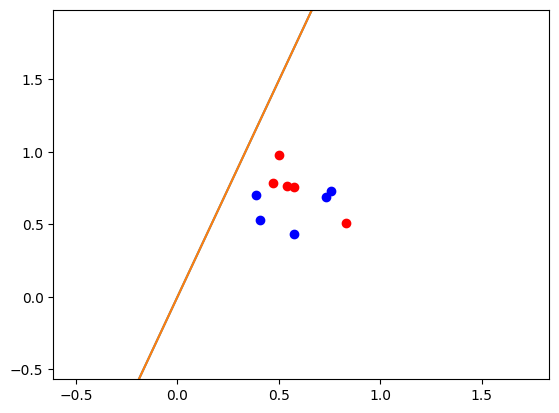

Bobot: [0.0001, 8.85031438657525e-05, 5.332726972630519e-05, 2.3236922994735715e-05]


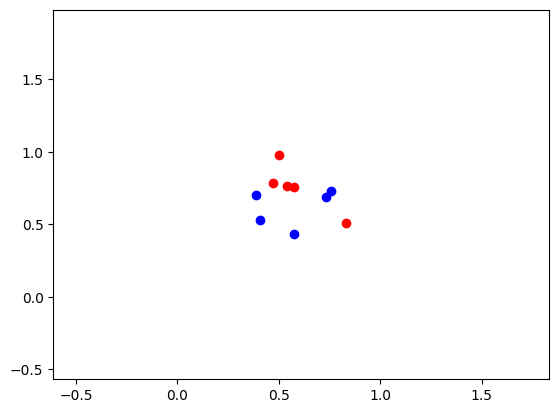

Bobot: [0.0, 3.8655484861187714e-05, -4.459472853512715e-05, -4.792899084744278e-05]


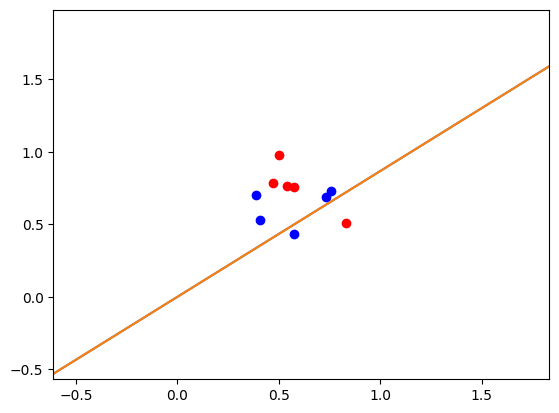


Epoch 3
Bobot: [0.0001, 0.00011447143924946846, 2.8116412365533633e-05, -1.565129563605973e-05]


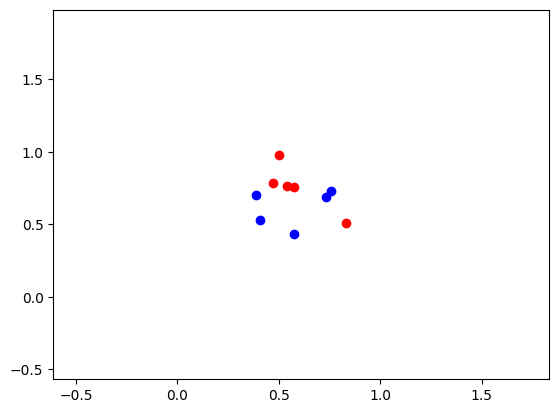

Bobot: [0.0, 6.75568329199623e-05, -5.015250108653776e-05, -8.33863469820019e-05]


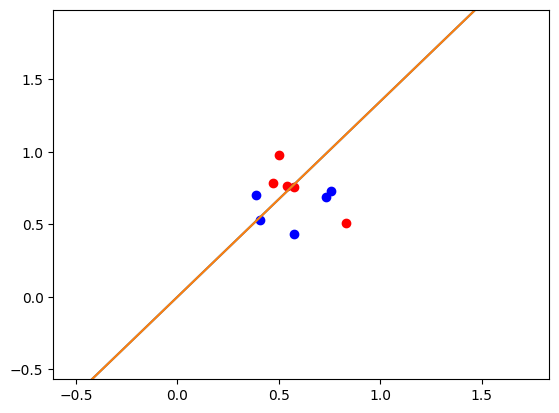

Bobot: [0.0001, 0.0001406966133215209, 1.8977494793749746e-05, -2.460384119361013e-05]


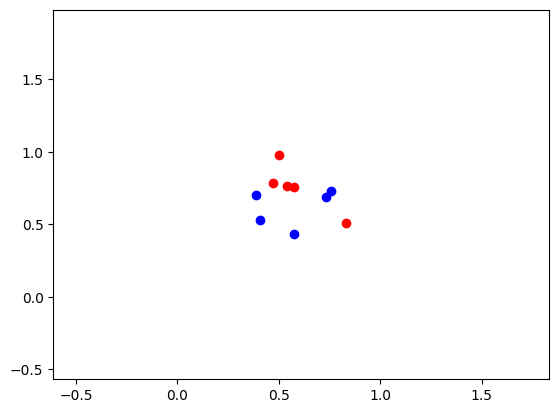

Bobot: [0.0, 8.321343184238288e-05, -5.6833705853742524e-05, -5.2536091149157015e-05]


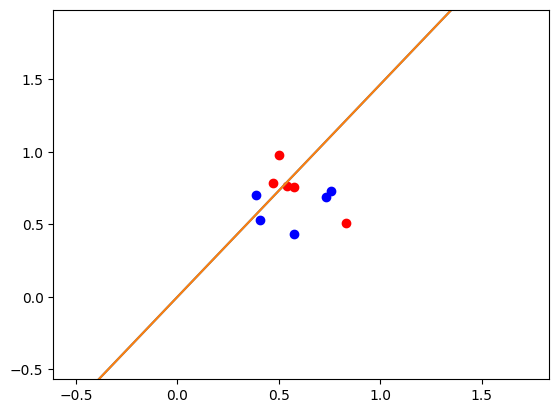

Bobot: [0.0001, 0.00012193976485184576, 1.3174579091495804e-05, 1.2311929037260355e-06]


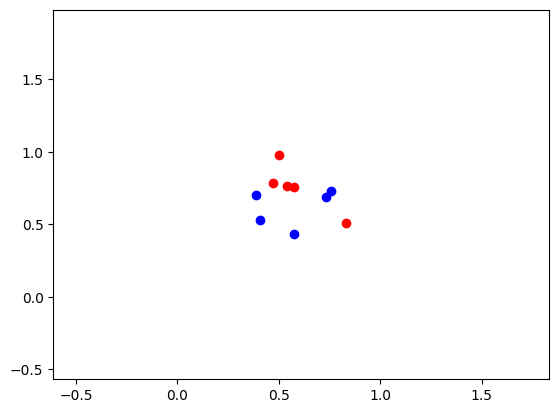

Bobot: [0.0, 7.209210584728097e-05, -8.474741916993653e-05, -6.993472093845246e-05]


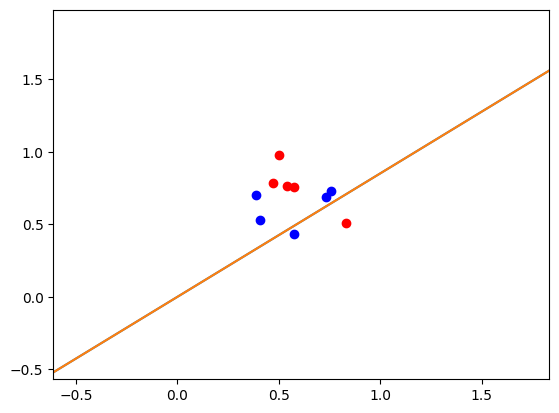


Epoch 4
Bobot: [0.0001, 0.00014790806023556172, -1.203627826927575e-05, -3.765702572706941e-05]


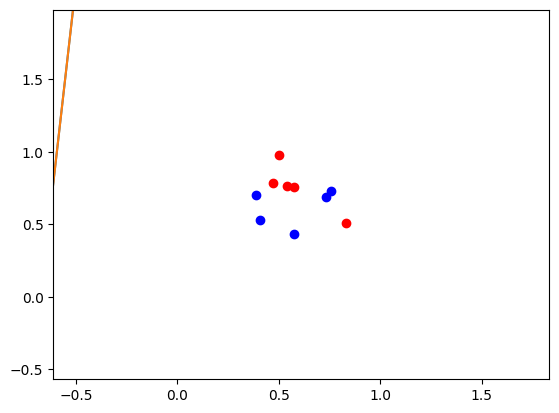

Bobot: [0.0, 0.00010099345390605556, -9.030519172134714e-05, -0.00010539207707301158]


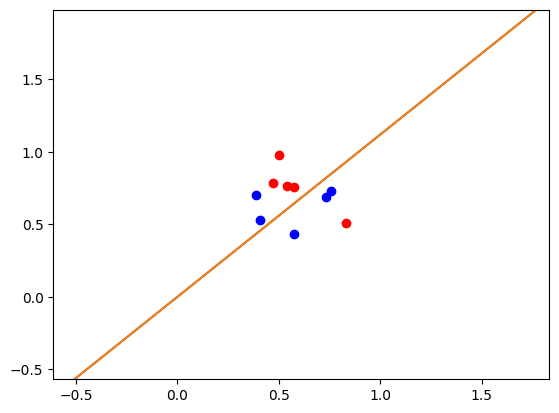

Bobot: [0.0001, 0.00017413323430761414, -2.1175195841059637e-05, -4.660957128461981e-05]


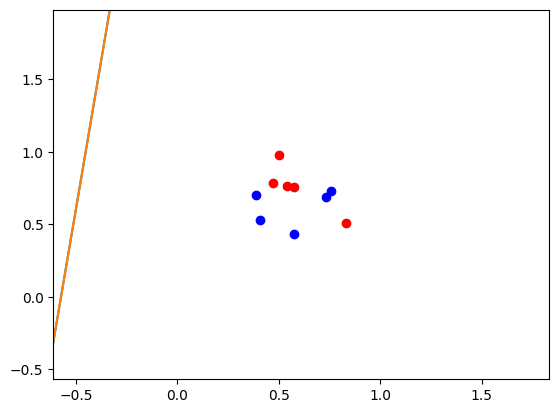

Bobot: [0.0, 0.00011665005282847612, -9.69863964885519e-05, -7.45418212401667e-05]


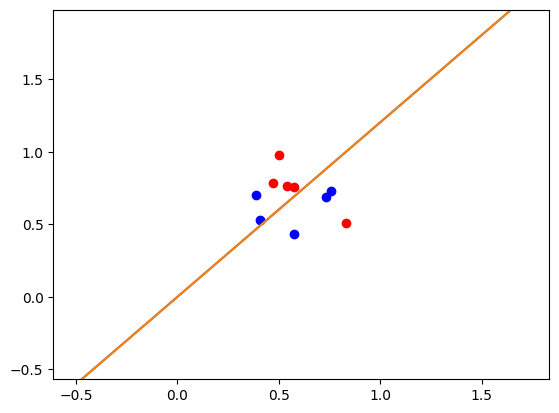

Bobot: [0.0001, 0.000155376385837939, -2.697811154331358e-05, -2.0774537187283644e-05]


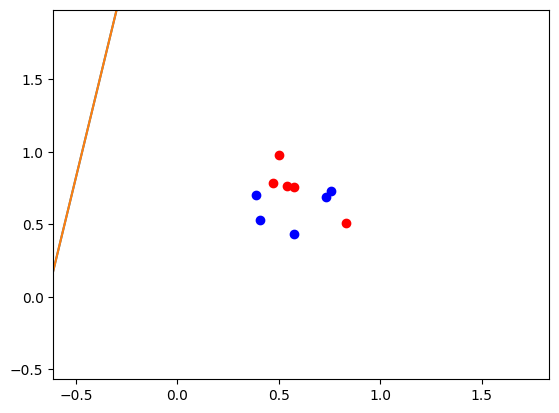

Bobot: [0.0, 0.00010552872683337422, -0.00012490010980474592, -9.194045102946214e-05]


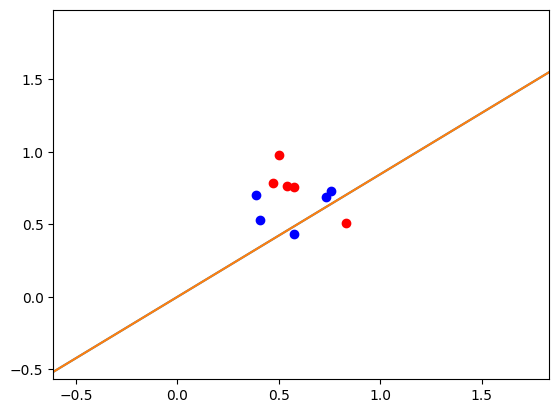


Epoch 5
Bobot: [0.0001, 0.00018134468122165496, -5.218896890408513e-05, -5.966275581807909e-05]


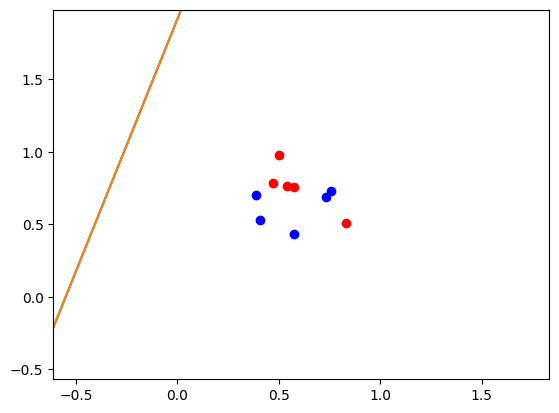

Bobot: [0.0, 0.0001344300748921488, -0.0001304578823561565, -0.00012739780716402126]


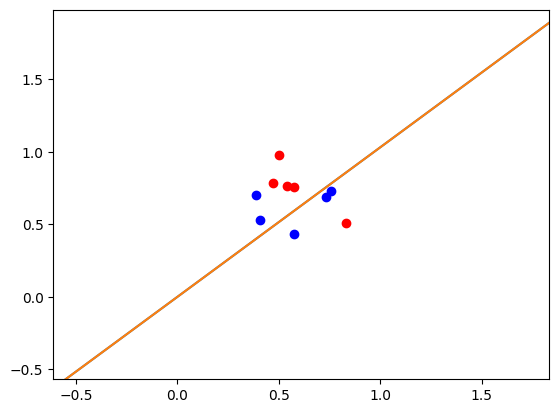

Bobot: [0.0001, 0.0002075698552937074, -6.1327886475869e-05, -6.861530137562948e-05]


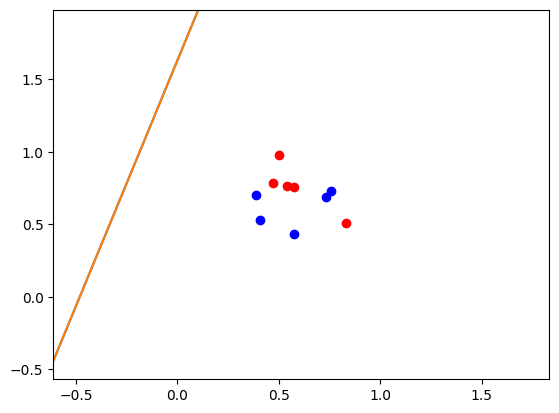

Bobot: [0.0, 0.00015008667381456937, -0.00013713908712336128, -9.654755133117637e-05]


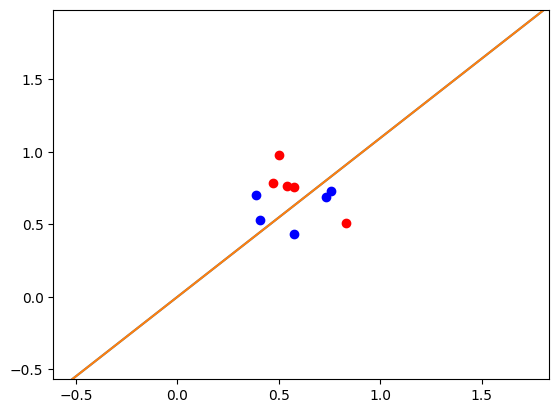

Bobot: [0.0001, 0.00018881300682403225, -6.713080217812295e-05, -4.278026727829332e-05]


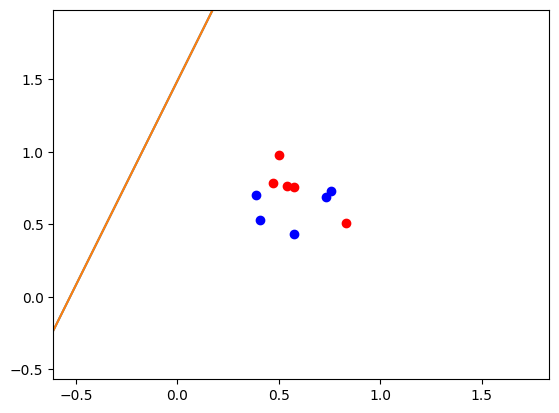

Bobot: [0.0, 0.00013896534781946746, -0.0001650528004395553, -0.00011394618112047182]


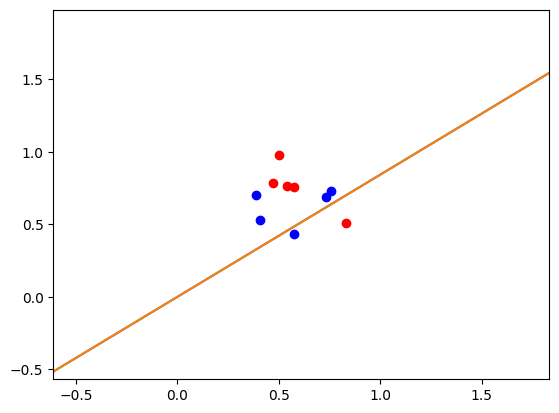


Epoch 6
Bobot: [0.0001, 0.0002147813022077482, -9.234165953889452e-05, -8.166848590908877e-05]


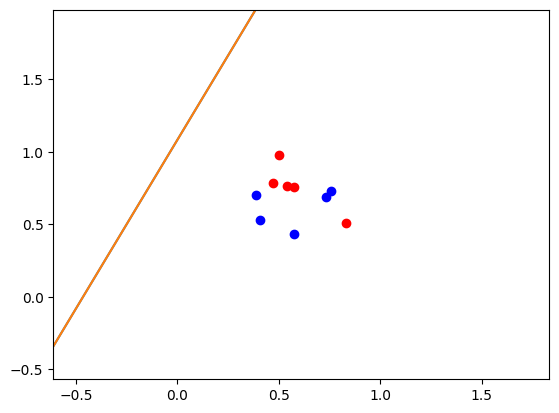

Bobot: [0.0, 0.00016786669587824204, -0.0001706105729909659, -0.00014940353725503093]


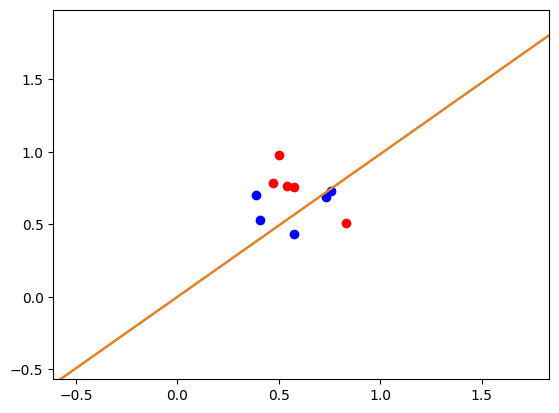

Bobot: [0.0001, 0.00024100647627980064, -0.00010148057711067839, -9.062103146663915e-05]


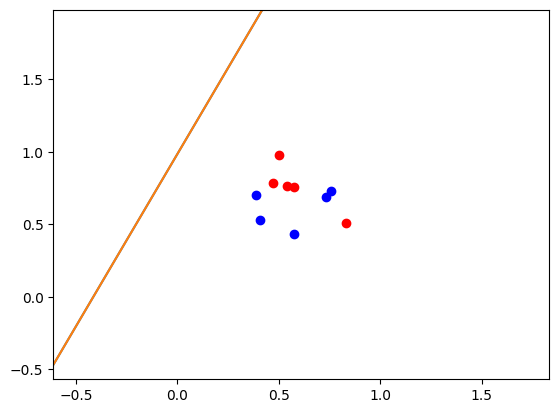

Bobot: [0.0, 0.0001835232948006626, -0.00017729177775817066, -0.00011855328142218604]


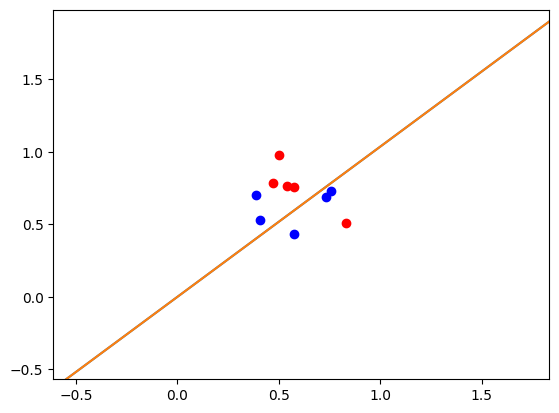

Bobot: [0.0001, 0.0002222496278101255, -0.00010728349281293233, -6.478599736930299e-05]


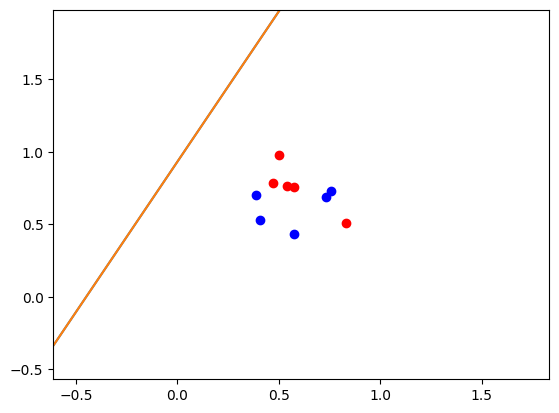

Bobot: [0.0, 0.0001724019688055607, -0.00020520549107436468, -0.00013595191121148147]


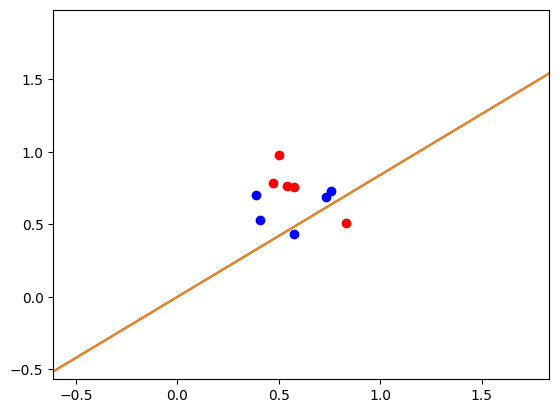


Epoch 7
Bobot: [0.0001, 0.0002482179231938415, -0.0001324943501737039, -0.00010367421600009842]


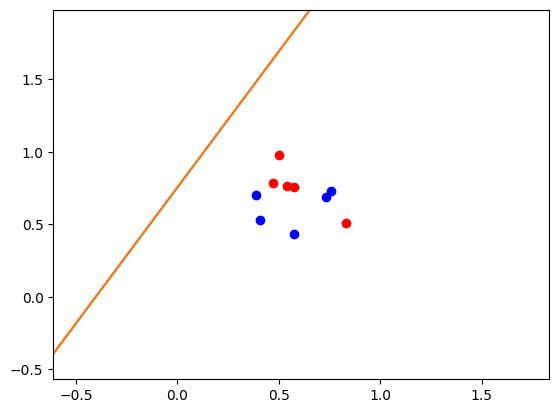

Bobot: [0.0, 0.00020130331686433534, -0.00021076326362577528, -0.0001714092673460406]


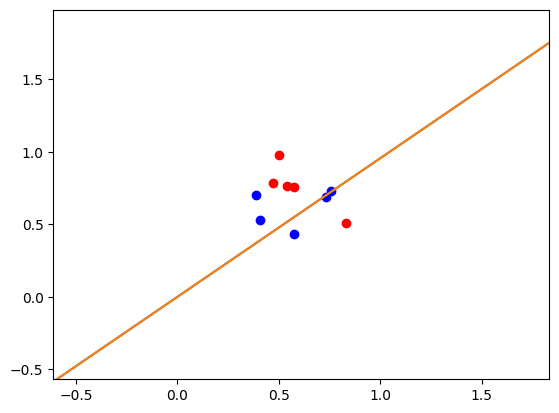

Bobot: [0.0001, 0.00027444309726589394, -0.00014163326774548779, -0.00011262676155764881]


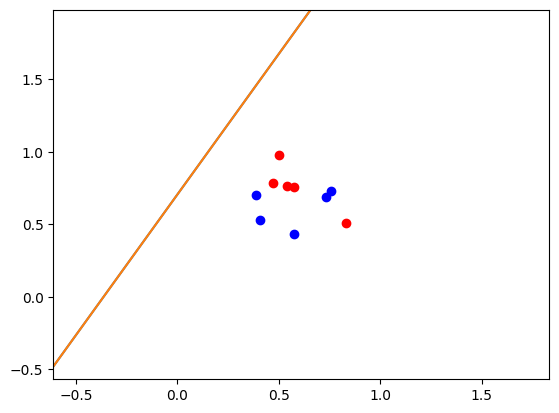

Bobot: [0.0, 0.0002169599157867559, -0.00021744446839298007, -0.0001405590115131957]


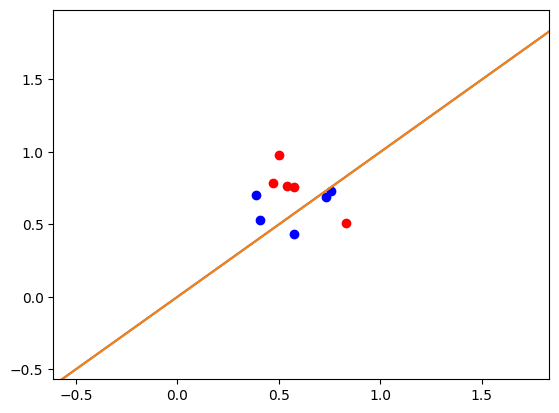

Bobot: [0.0001, 0.0002556862487962188, -0.00014743618344774173, -8.679172746031265e-05]


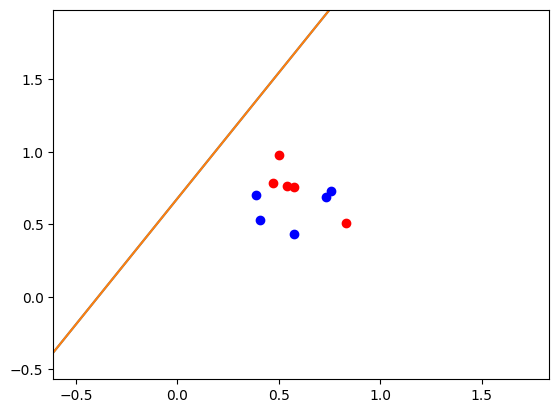

Bobot: [0.0, 0.000205838589791654, -0.00024535818170917407, -0.00015795764130249117]


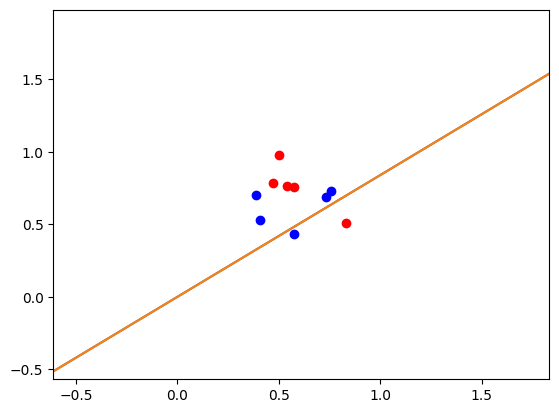


Epoch 8
Bobot: [0.0001, 0.0002816545441799347, -0.00017264704080851328, -0.0001256799460911081]


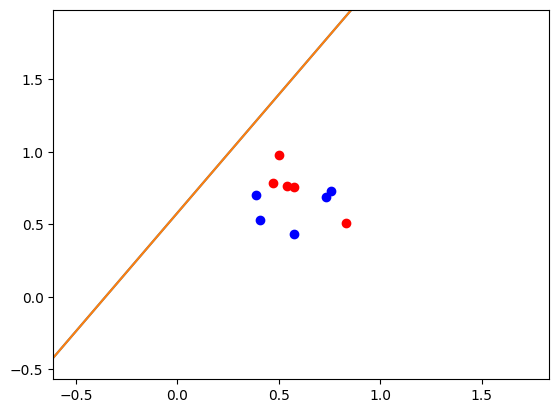

Bobot: [0.0, 0.0002347399378504286, -0.00025091595426058466, -0.0001934149974370503]


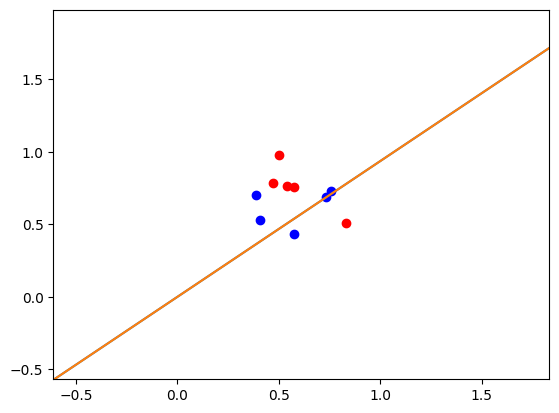

Bobot: [0.0001, 0.0003078797182519872, -0.00018178595838029717, -0.0001346324916486585]


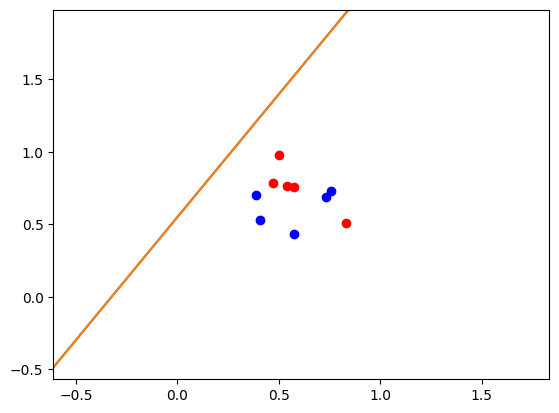

Bobot: [0.0, 0.00025039653677284916, -0.00025759715902778945, -0.0001625647416042054]


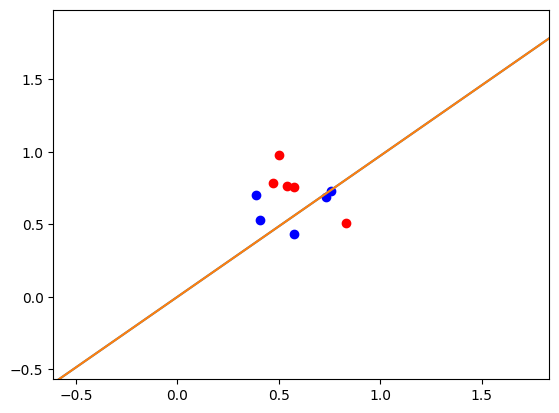

Bobot: [0.0001, 0.00028912286978231204, -0.0001875888740825511, -0.00010879745755132235]


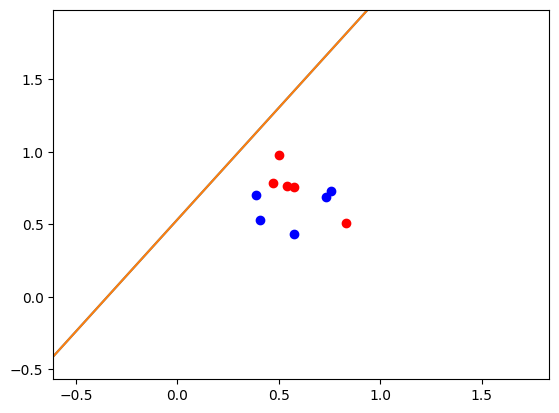


Epoch 9
Bobot: [0.0, 0.00020580223302176382, -0.00023840776330696396, -0.00019441780685574707]


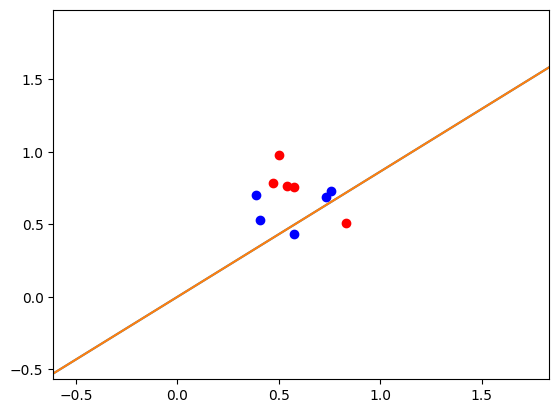

Bobot: [0.0001, 0.0002816181874100446, -0.00016569662240630318, -0.00016214011164436402]


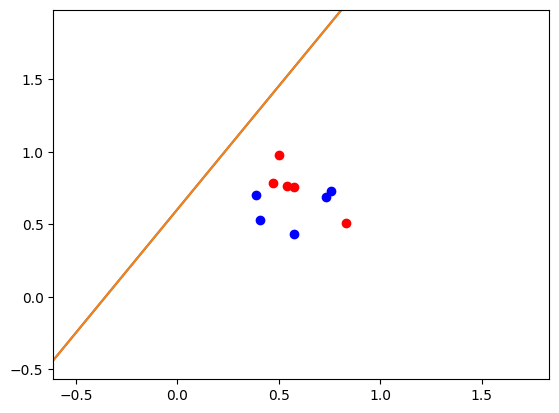

Bobot: [0.0, 0.00022413500593090657, -0.00024150782305379544, -0.0001900723615999109]


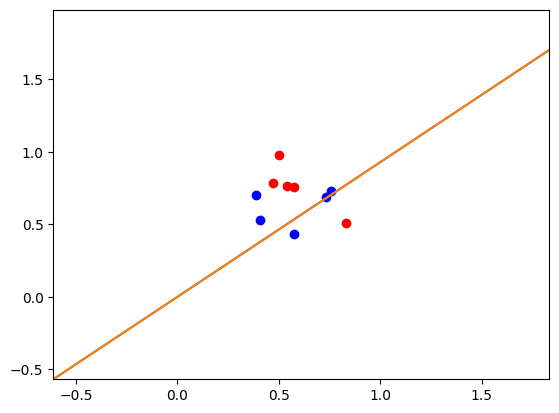

Bobot: [0.0001, 0.00026286133894036945, -0.0001714995381085571, -0.00013630507754702786]


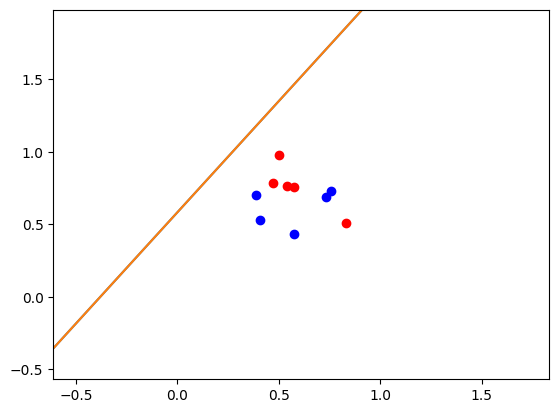


Epoch 10
Bobot: [0.0, 0.00017954070217982124, -0.00022231842733296995, -0.00022192542685145258]


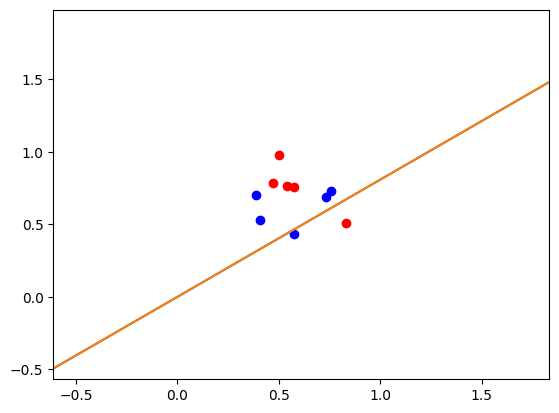

Bobot: [0.0001, 0.00025535665656810196, -0.00014960728643230917, -0.00018964773164006953]


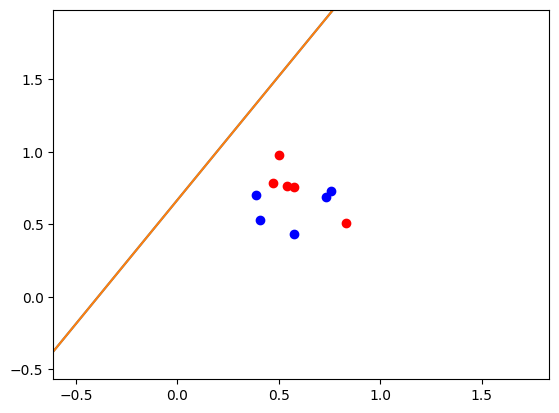

Bobot: [0.0, 0.00019787347508896393, -0.00022541848707980142, -0.00021757998159561642]


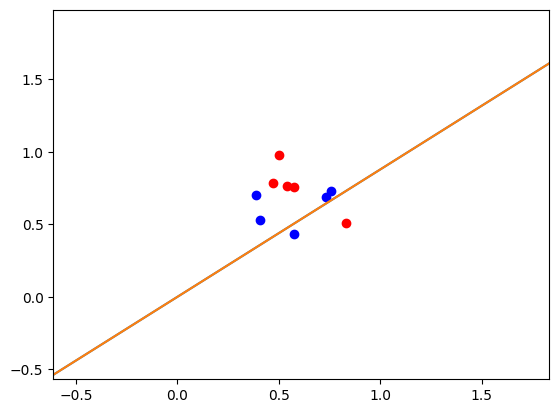

Bobot: [0.0001, 0.00023659980809842681, -0.00015541020213456308, -0.00016381269754273337]


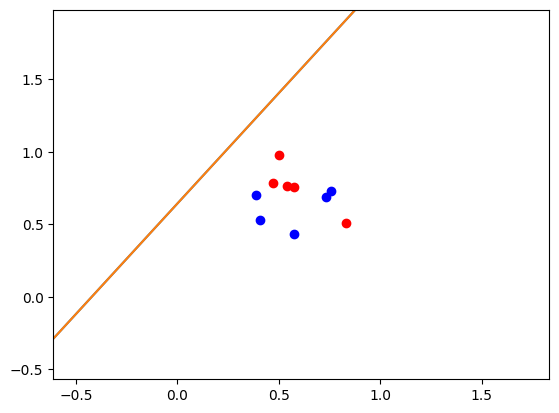

Epochs: 10
Accuracy: 0.484375


In [72]:
w, epoch = percep_fit(X_train, y_train, a=0.0001 , verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 0.0001
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -0.8332063676054823, -0.5081888922441284, -0.8562034930442471]


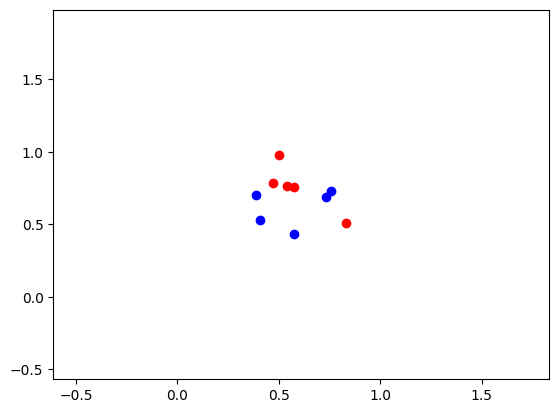

Bobot: [0.0, -0.0750468237226749, 0.21892251676247942, -0.5334265409304166]


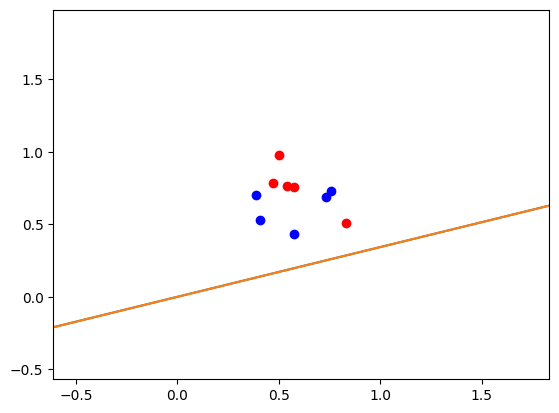

Bobot: [1.0, 0.656350980292911, 0.9102224755653544, 0.054398516953501064]


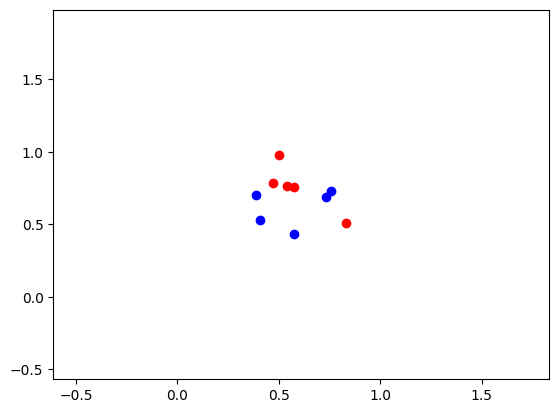

Bobot: [0.0, 0.08151916550153071, 0.1521104690904318, -0.22492398260196778]


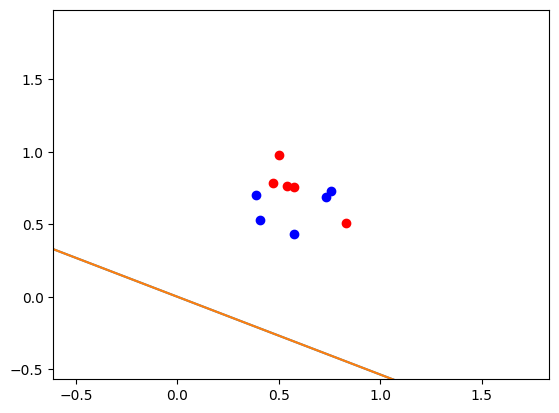

Bobot: [-1.0, -0.4169574245441171, -0.8271095135238915, -0.9365831210237527]


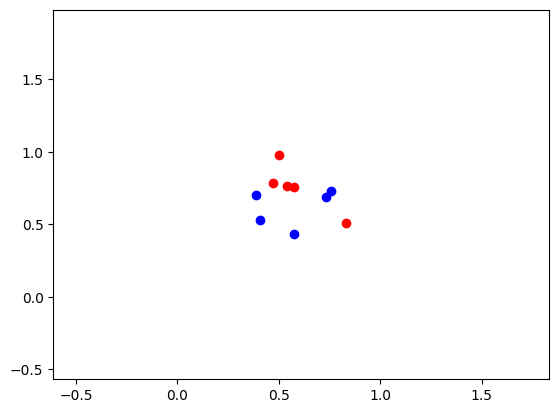


Epoch 2
Bobot: [0.0, 0.34120211933869027, -0.09999810451728364, -0.6138061689099222]


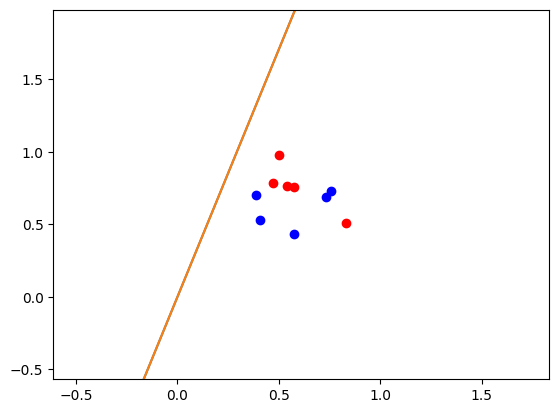

Bobot: [1.0, 1.072599923354276, 0.5913018542855913, -0.025981111026004533]


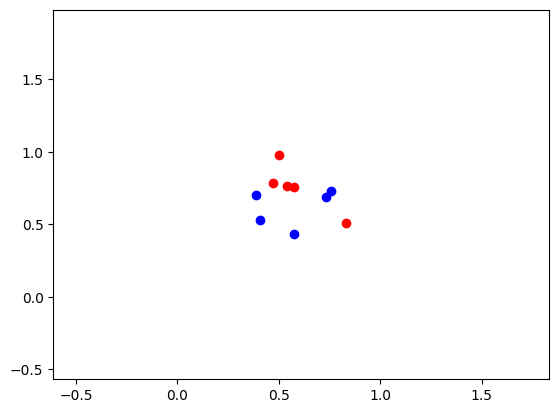

Bobot: [0.0, 0.4977681085628958, -0.16681015218933126, -0.3053036105814734]


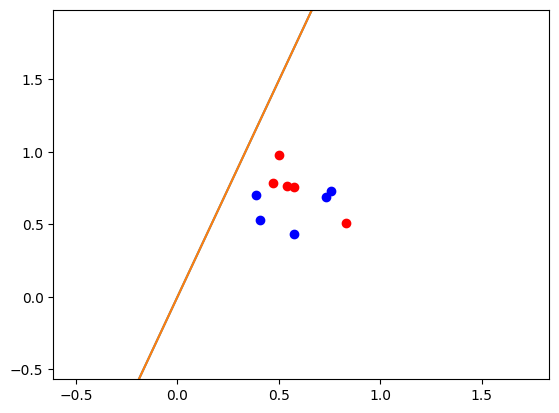

Bobot: [1.0, 0.8850314386575245, 0.5332726972630519, 0.2323692299473571]


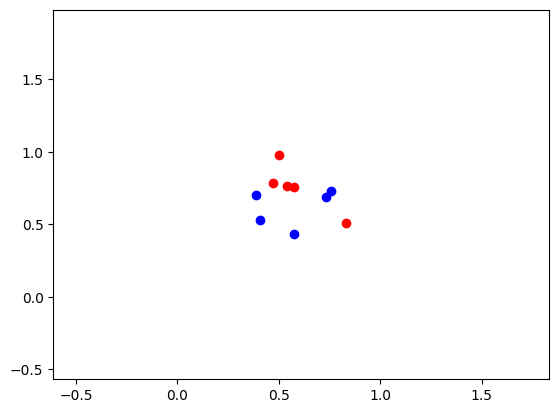

Bobot: [0.0, 0.3865548486118767, -0.44594728535127137, -0.4792899084744279]


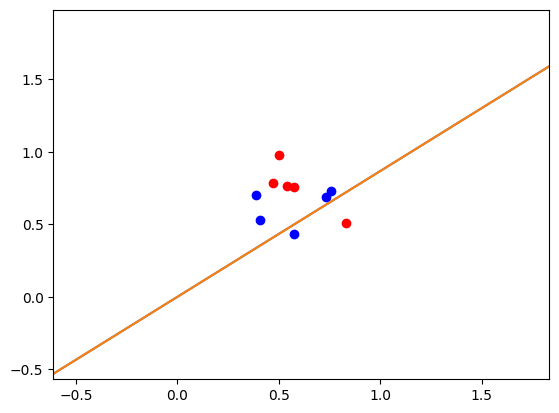


Epoch 3
Bobot: [1.0, 1.144714392494684, 0.2811641236553365, -0.15651295636059737]


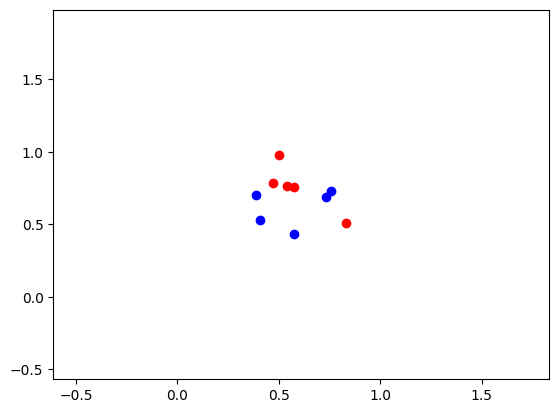

Bobot: [0.0, 0.6755683291996226, -0.5015250108653774, -0.833863469820019]


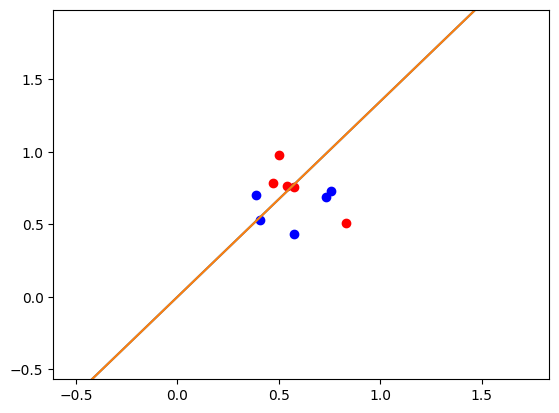

Bobot: [1.0, 1.4069661332152084, 0.1897749479374976, -0.24603841193610132]


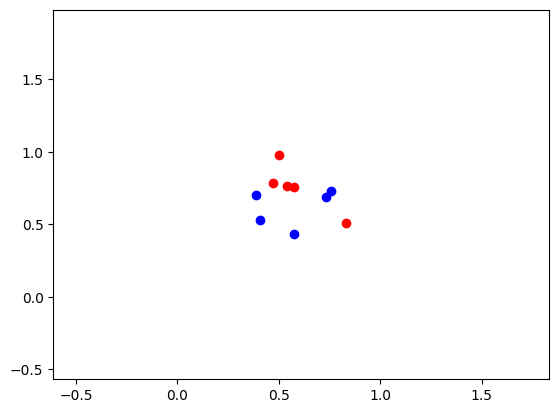

Bobot: [0.0, 0.8321343184238281, -0.568337058537425, -0.5253609114915702]


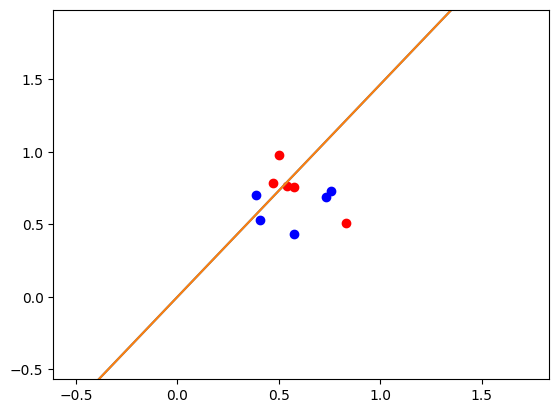

Bobot: [1.0, 1.219397648518457, 0.1317457909149582, 0.012311929037260305]


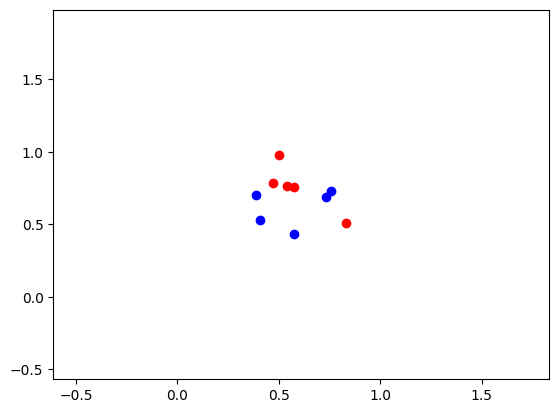

Bobot: [0.0, 0.7209210584728092, -0.8474741916993651, -0.6993472093845247]


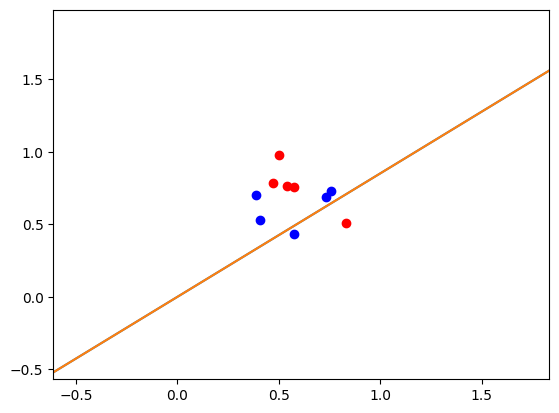


Epoch 4
Bobot: [1.0, 1.4790806023556167, -0.12036278269275724, -0.37657025727069415]


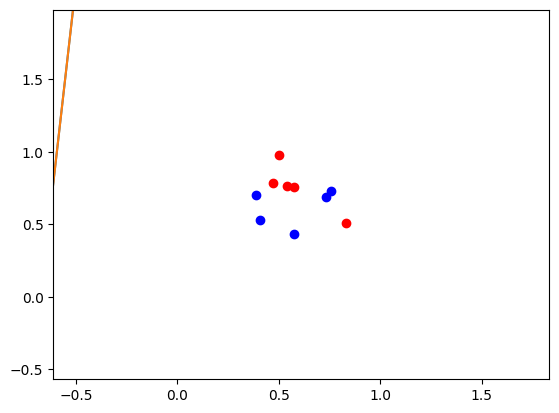

Bobot: [0.0, 1.0099345390605552, -0.9030519172134711, -1.053920770730116]


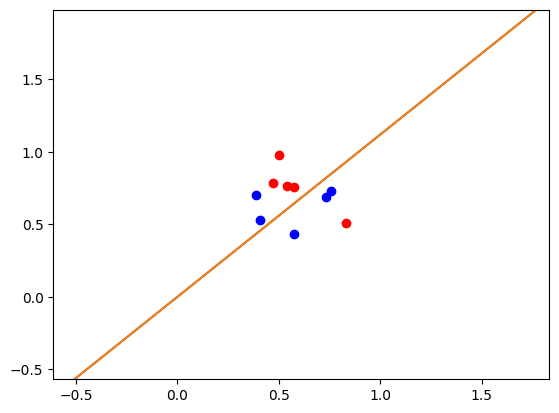

Bobot: [1.0, 1.7413323430761412, -0.21175195841059613, -0.4660957128461982]


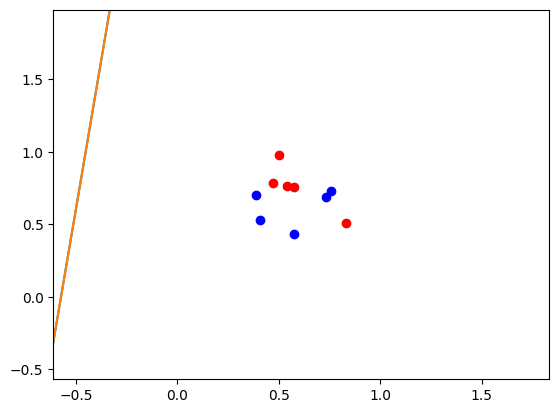

Bobot: [0.0, 1.166500528284761, -0.9698639648855187, -0.7454182124016671]


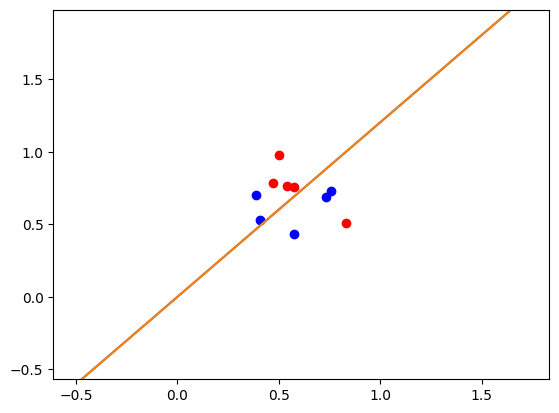

Bobot: [1.0, 1.5537638583793898, -0.26978111543313554, -0.2077453718728366]


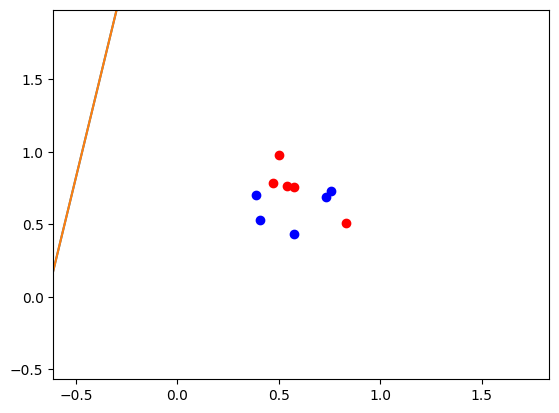

Bobot: [0.0, 1.055287268333742, -1.2490010980474588, -0.9194045102946216]


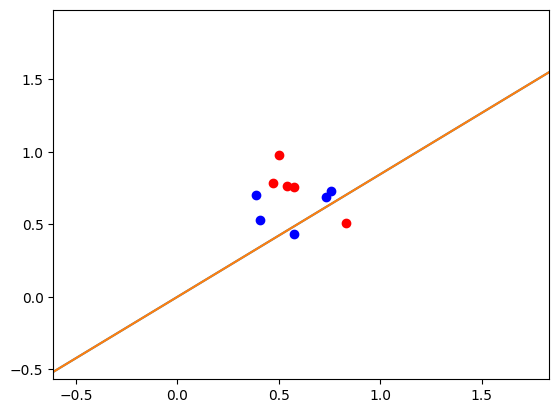


Epoch 5
Bobot: [1.0, 1.8134468122165495, -0.521889689040851, -0.596627558180791]


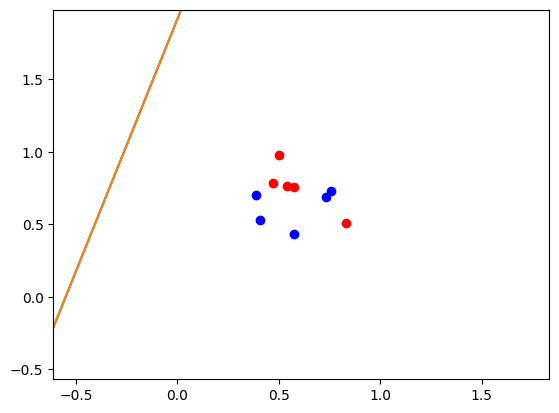

Bobot: [0.0, 1.344300748921488, -1.304578823561565, -1.2739780716402127]


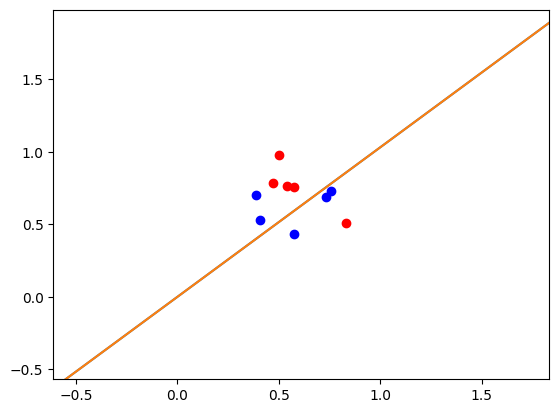

Bobot: [1.0, 2.075698552937074, -0.61327886475869, -0.686153013756295]


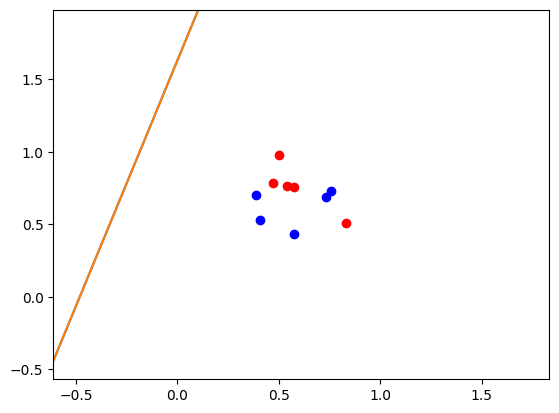

Bobot: [0.0, 1.5008667381456937, -1.3713908712336127, -0.9654755133117638]


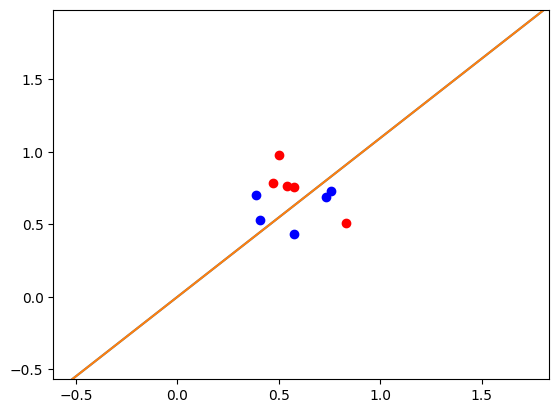

Bobot: [1.0, 1.8881300682403226, -0.6713080217812295, -0.4278026727829334]


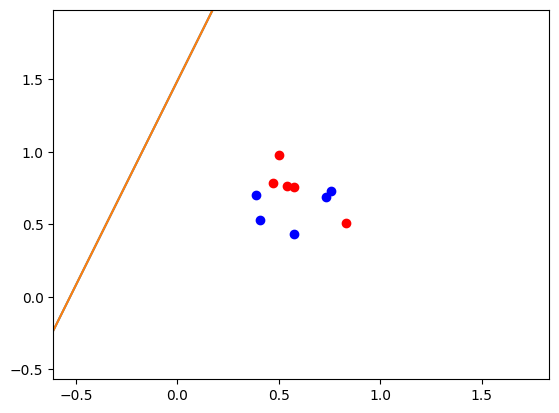

Bobot: [0.0, 1.3896534781946748, -1.6505280043955528, -1.1394618112047183]


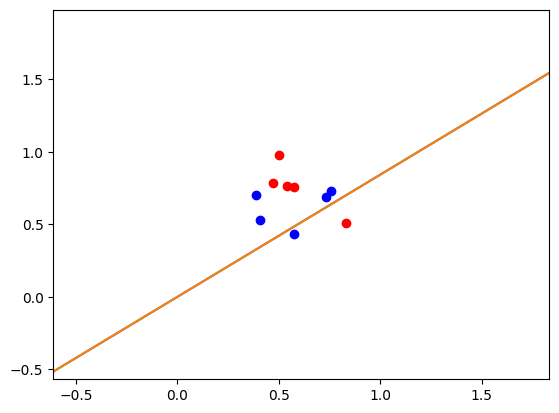


Epoch 6
Bobot: [1.0, 2.1478130220774823, -0.9234165953889449, -0.8166848590908878]


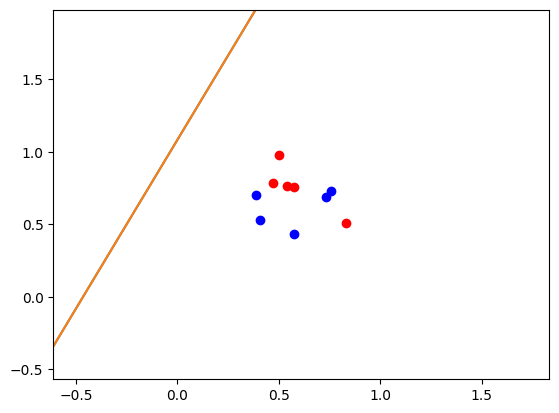

Bobot: [0.0, 1.6786669587824208, -1.706105729909659, -1.4940353725503095]


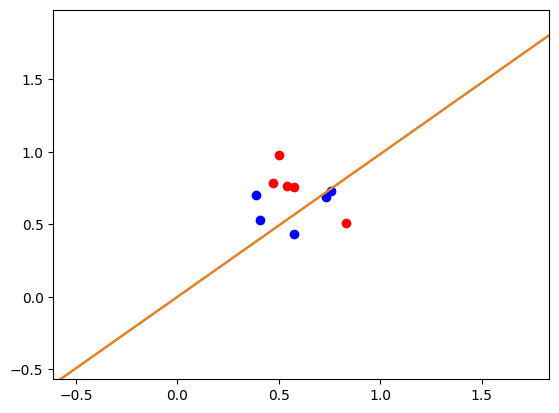

Bobot: [1.0, 2.4100647627980067, -1.014805771106784, -0.9062103146663918]


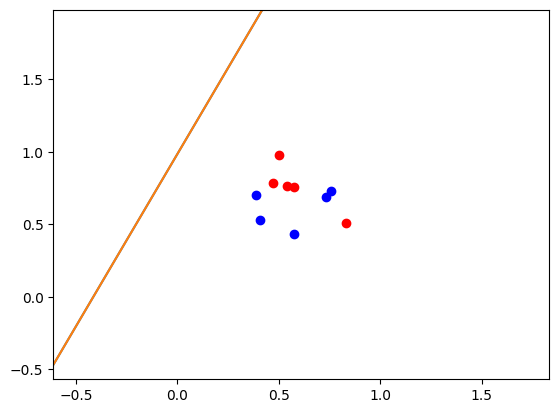

Bobot: [0.0, 1.8352329480066265, -1.7729177775817067, -1.1855328142218606]


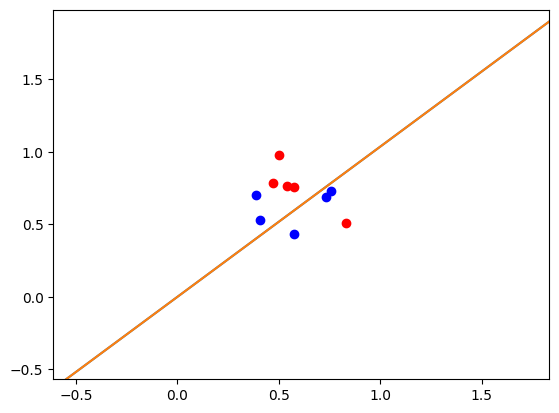

Bobot: [1.0, 2.2224962781012554, -1.0728349281293235, -0.6478599736930302]


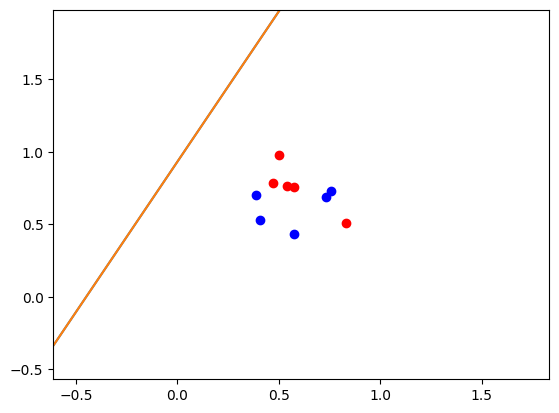

Bobot: [0.0, 1.7240196880556076, -2.0520549107436468, -1.3595191121148151]


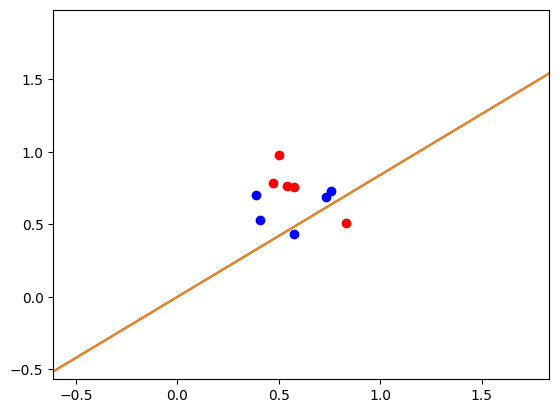


Epoch 7
Bobot: [1.0, 2.482179231938415, -1.3249435017370388, -1.0367421600009847]


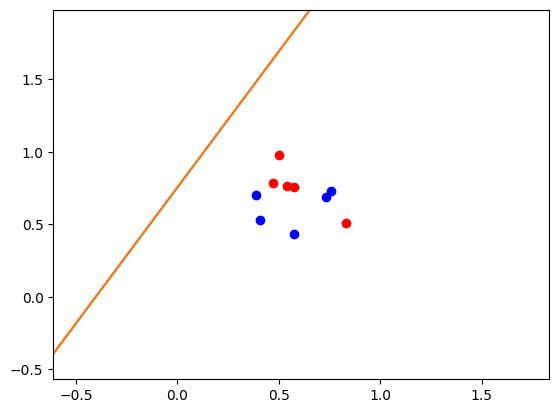

Bobot: [0.0, 2.0130331686433536, -2.107632636257753, -1.7140926734604065]


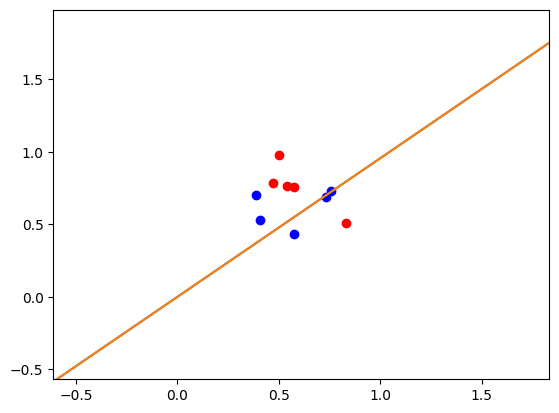

Bobot: [1.0, 2.7444309726589395, -1.416332677454878, -1.1262676155764888]


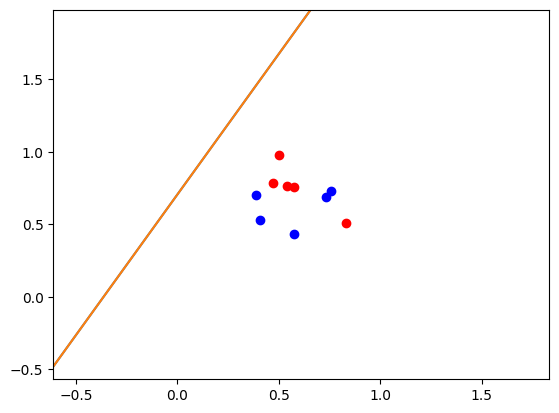

Bobot: [0.0, 2.1695991578675593, -2.1744446839298006, -1.4055901151319576]


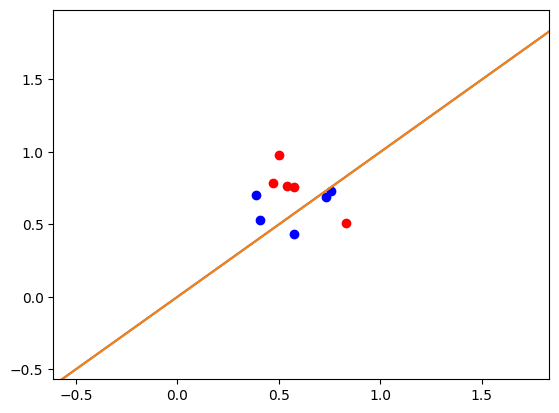

Bobot: [1.0, 2.556862487962188, -1.4743618344774174, -0.8679172746031272]


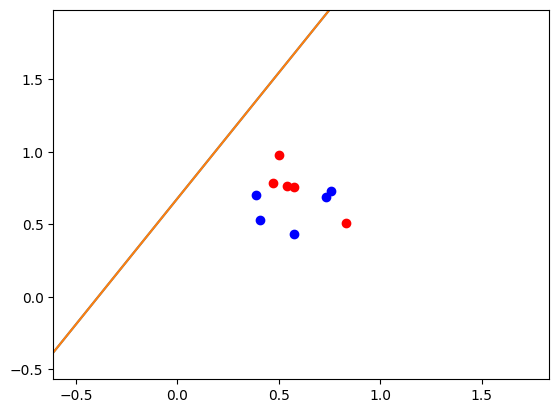

Bobot: [0.0, 2.0583858979165406, -2.4535818170917407, -1.5795764130249121]


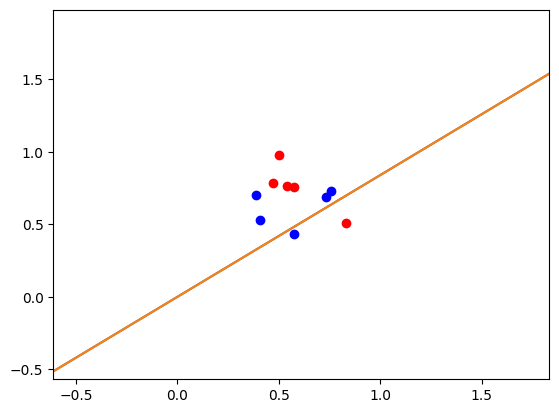


Epoch 8
Bobot: [1.0, 2.816545441799348, -1.7264704080851327, -1.2567994609110817]


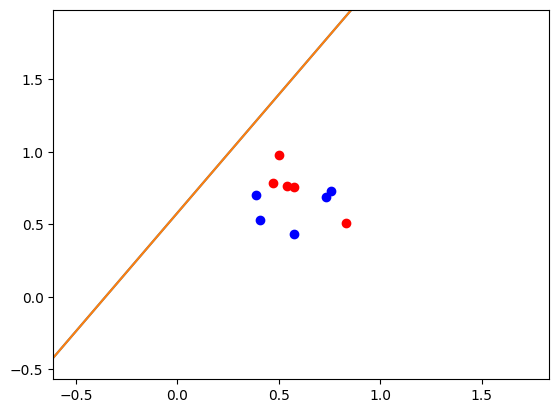

Bobot: [0.0, 2.3473993785042864, -2.509159542605847, -1.9341499743705035]


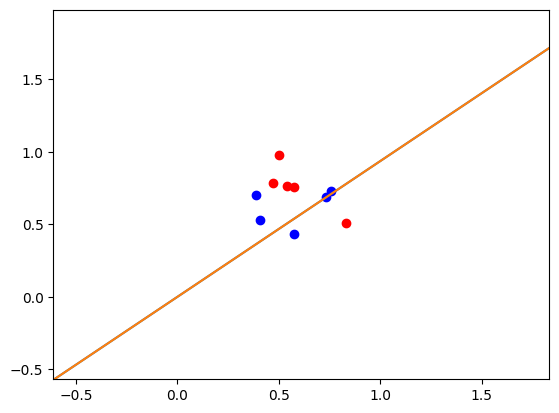

Bobot: [1.0, 3.0787971825198723, -1.8178595838029719, -1.3463249164865858]


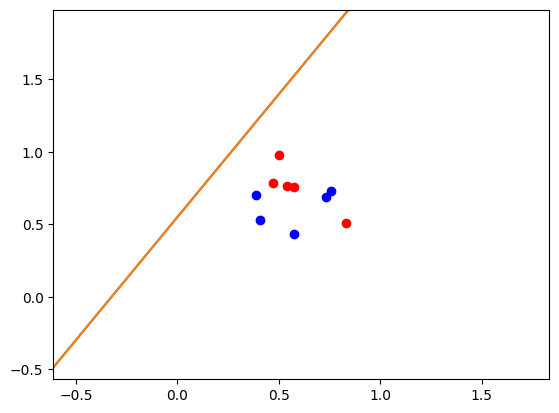

Bobot: [0.0, 2.503965367728492, -2.5759715902778946, -1.6256474160420546]


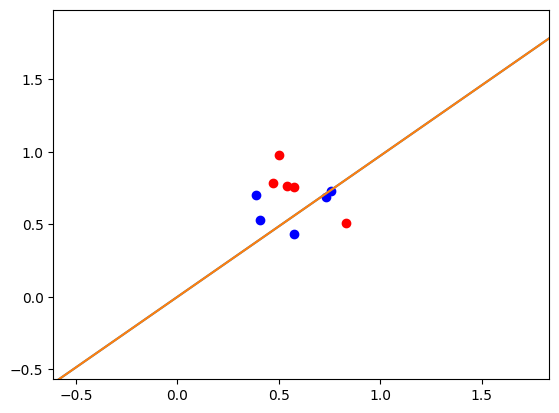

Bobot: [1.0, 2.891228697823121, -1.8758887408255114, -1.0879745755132242]


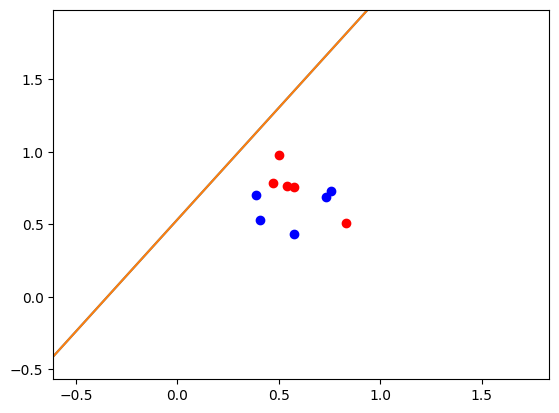


Epoch 9
Bobot: [0.0, 2.058022330217639, -2.38407763306964, -1.9441780685574712]


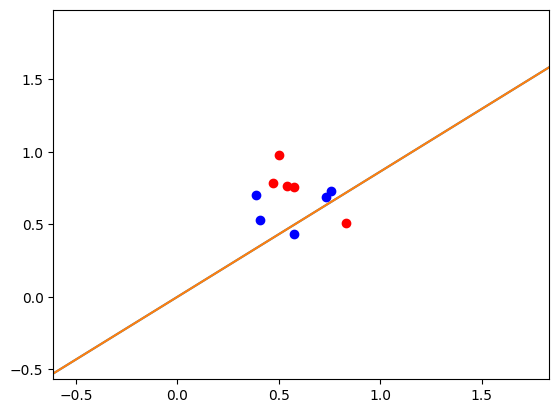

Bobot: [1.0, 2.816181874100446, -1.6569662240630318, -1.6214011164436406]


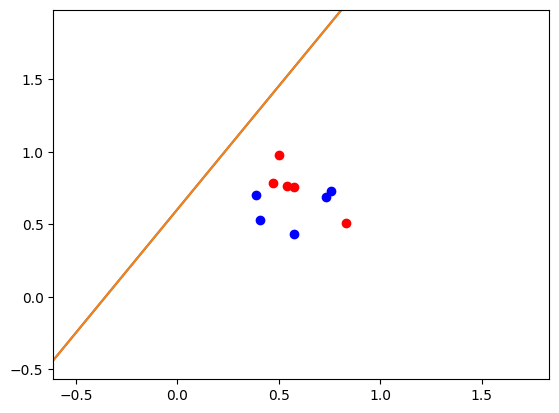

Bobot: [0.0, 2.241350059309066, -2.4150782305379543, -1.9007236159991094]


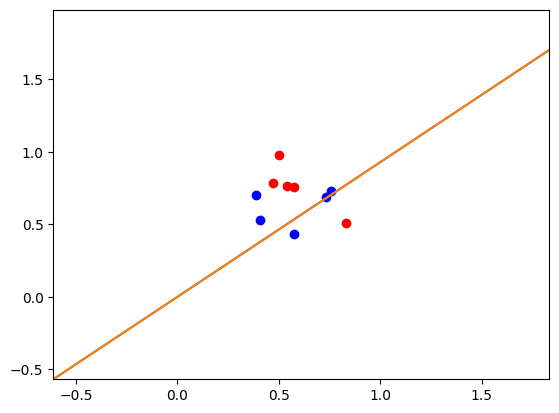

Bobot: [1.0, 2.6286133894036947, -1.7149953810855711, -1.363050775470279]


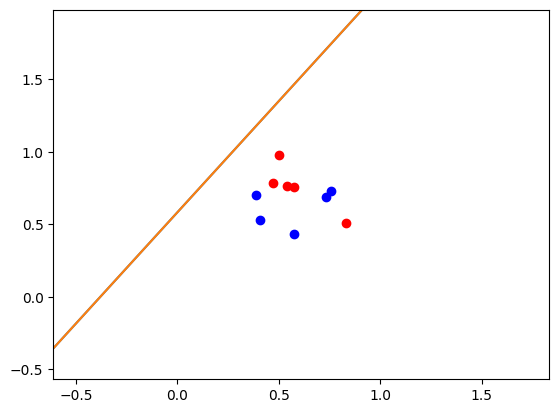


Epoch 10
Bobot: [0.0, 1.7954070217982125, -2.2231842733296996, -2.219254268514526]


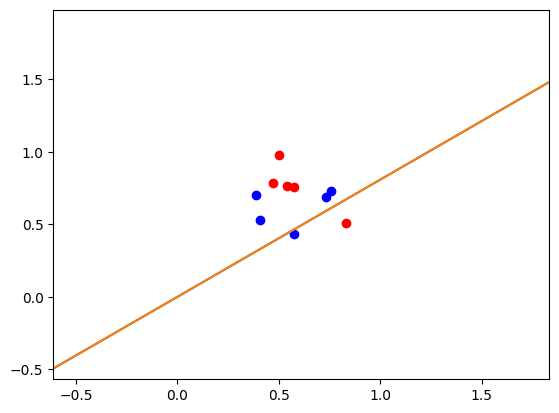

Bobot: [1.0, 2.55356656568102, -1.4960728643230916, -1.8964773164006954]


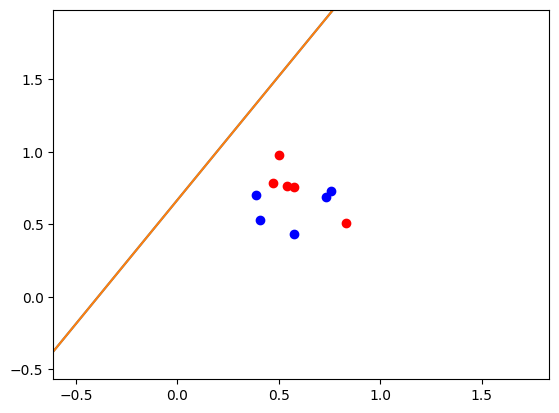

Bobot: [0.0, 1.9787347508896396, -2.254184870798014, -2.1757998159561645]


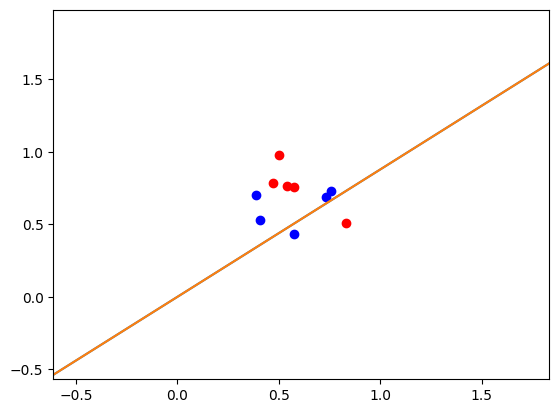

Bobot: [1.0, 2.3659980809842684, -1.554102021345631, -1.638126975427334]


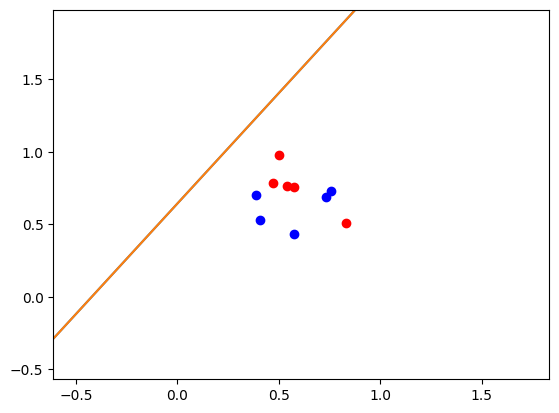

Epochs: 10
Accuracy: 0.484375


In [73]:
w, epoch = percep_fit(X_train, y_train, a=1.0, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 1
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:



Epoch 1
Bobot: [-1.0, -0.8332063676054823, -0.5081888922441284, -0.8562034930442471]


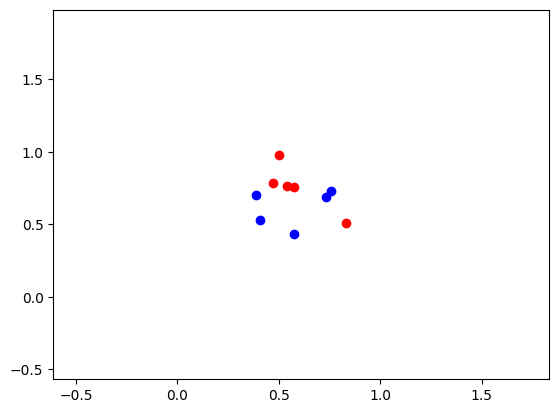

Bobot: [0.0, -0.0750468237226749, 0.21892251676247942, -0.5334265409304166]


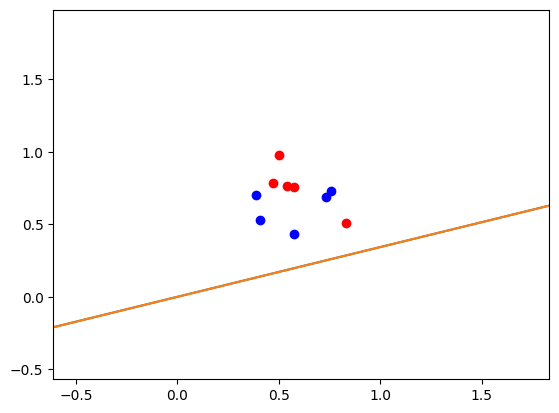

Bobot: [1.0, 0.656350980292911, 0.9102224755653544, 0.054398516953501064]


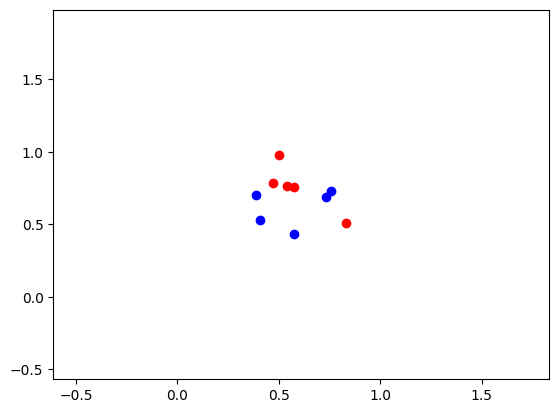

Bobot: [0.0, 0.08151916550153071, 0.1521104690904318, -0.22492398260196778]


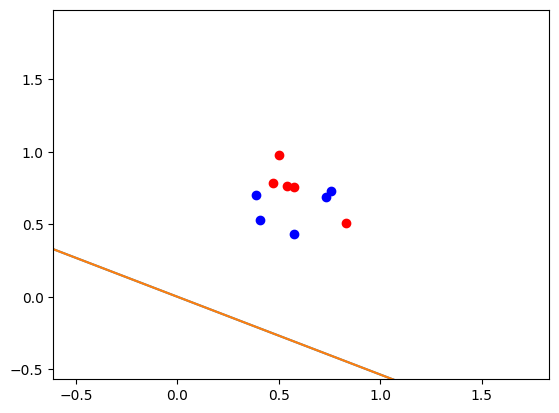

Bobot: [-1.0, -0.4169574245441171, -0.8271095135238915, -0.9365831210237527]


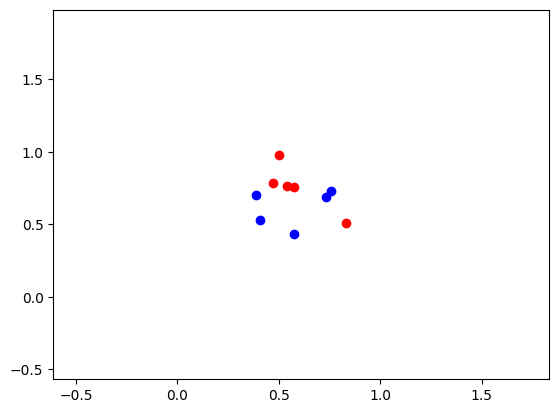


Epoch 2
Bobot: [0.0, 0.34120211933869027, -0.09999810451728364, -0.6138061689099222]


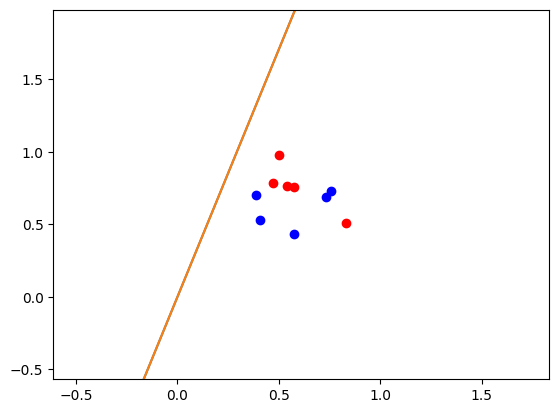

Bobot: [1.0, 1.072599923354276, 0.5913018542855913, -0.025981111026004533]


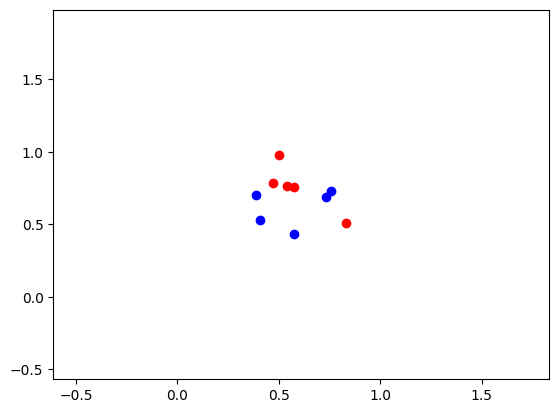

Bobot: [0.0, 0.4977681085628958, -0.16681015218933126, -0.3053036105814734]


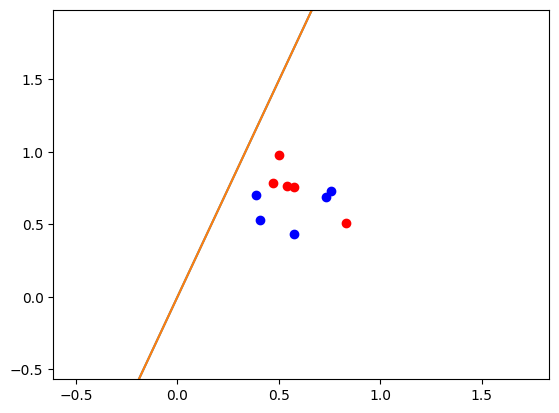

Bobot: [1.0, 0.8850314386575245, 0.5332726972630519, 0.2323692299473571]


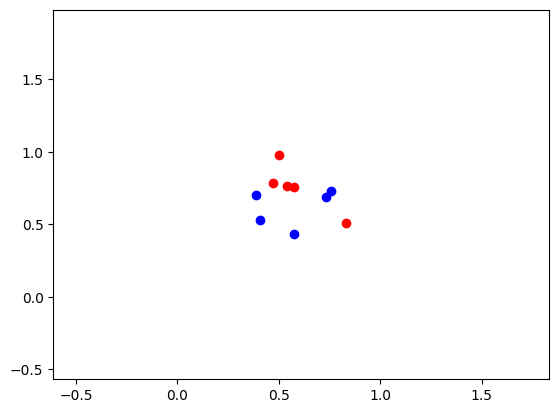

Bobot: [0.0, 0.3865548486118767, -0.44594728535127137, -0.4792899084744279]


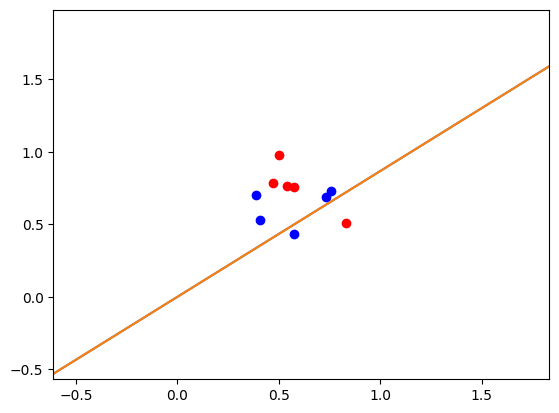


Epoch 3
Bobot: [1.0, 1.144714392494684, 0.2811641236553365, -0.15651295636059737]


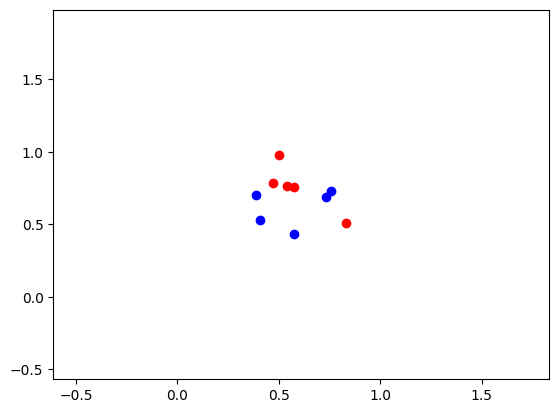

Bobot: [0.0, 0.6755683291996226, -0.5015250108653774, -0.833863469820019]


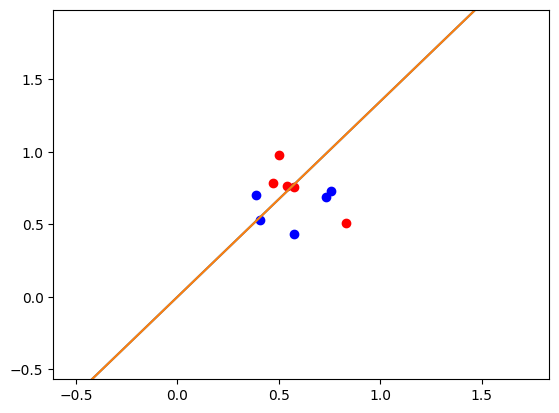

Bobot: [1.0, 1.4069661332152084, 0.1897749479374976, -0.24603841193610132]


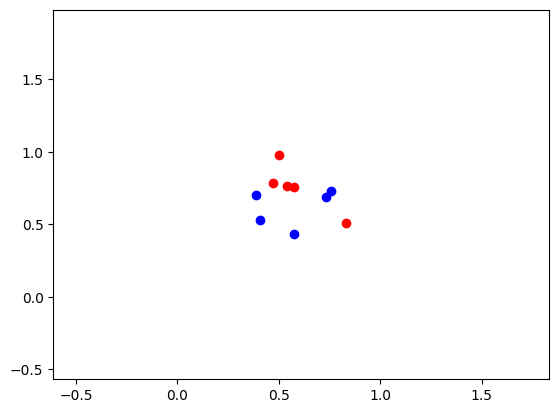

Bobot: [0.0, 0.8321343184238281, -0.568337058537425, -0.5253609114915702]


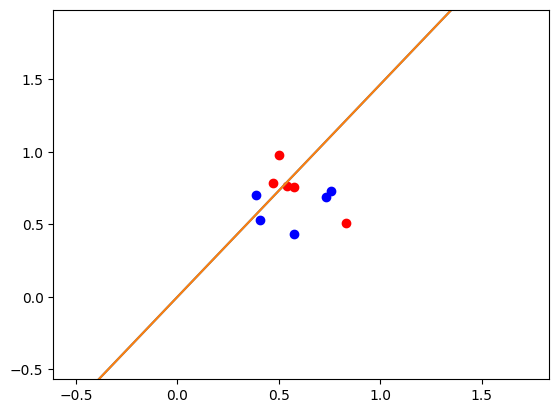

Bobot: [1.0, 1.219397648518457, 0.1317457909149582, 0.012311929037260305]


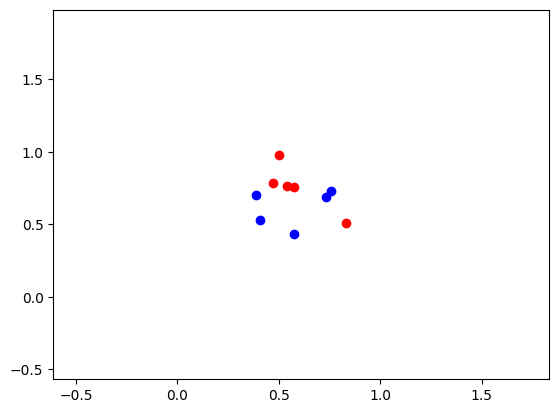

Bobot: [0.0, 0.7209210584728092, -0.8474741916993651, -0.6993472093845247]


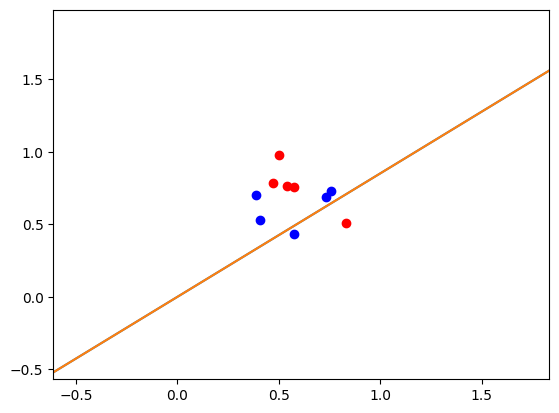


Epoch 4
Bobot: [1.0, 1.4790806023556167, -0.12036278269275724, -0.37657025727069415]


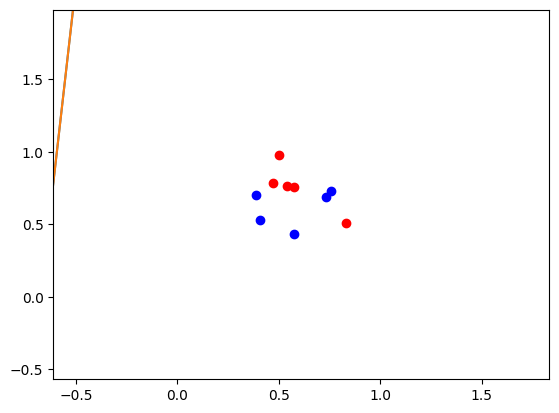

Bobot: [0.0, 1.0099345390605552, -0.9030519172134711, -1.053920770730116]


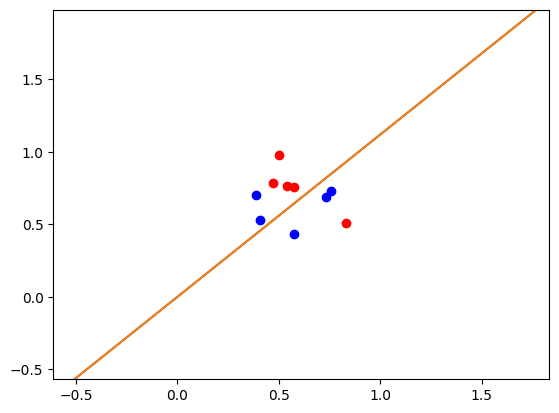

Bobot: [1.0, 1.7413323430761412, -0.21175195841059613, -0.4660957128461982]


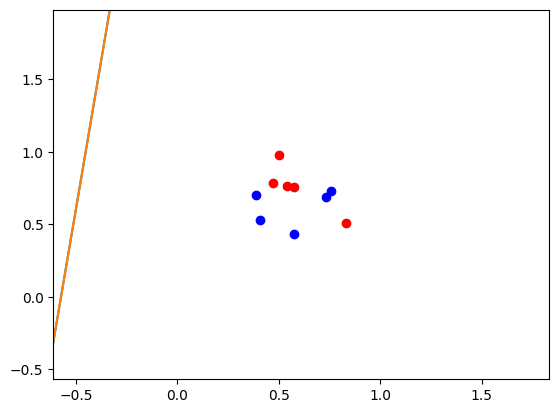

Bobot: [0.0, 1.166500528284761, -0.9698639648855187, -0.7454182124016671]


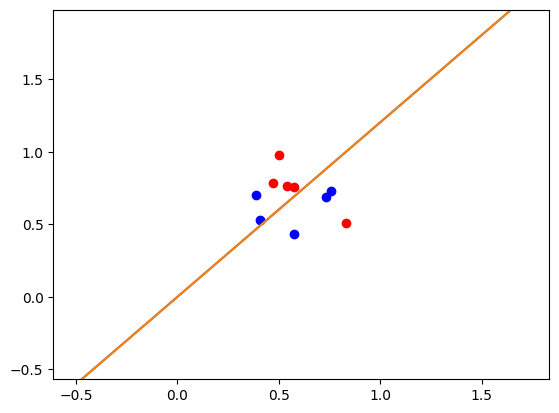

Bobot: [1.0, 1.5537638583793898, -0.26978111543313554, -0.2077453718728366]


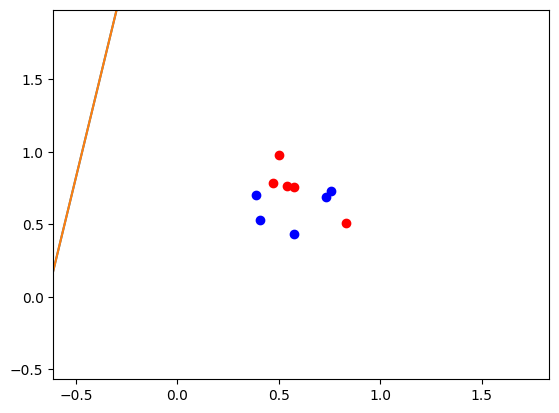

Bobot: [0.0, 1.055287268333742, -1.2490010980474588, -0.9194045102946216]


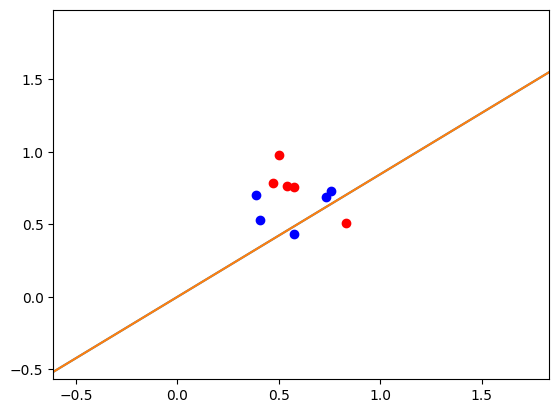


Epoch 5
Bobot: [1.0, 1.8134468122165495, -0.521889689040851, -0.596627558180791]


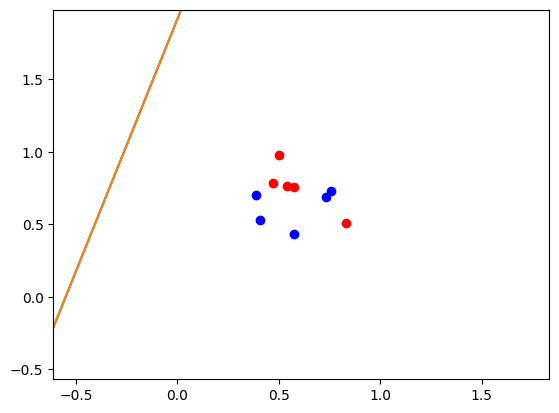

Bobot: [0.0, 1.344300748921488, -1.304578823561565, -1.2739780716402127]


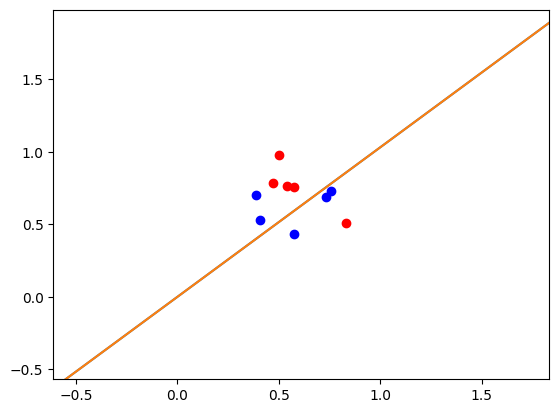

Bobot: [1.0, 2.075698552937074, -0.61327886475869, -0.686153013756295]


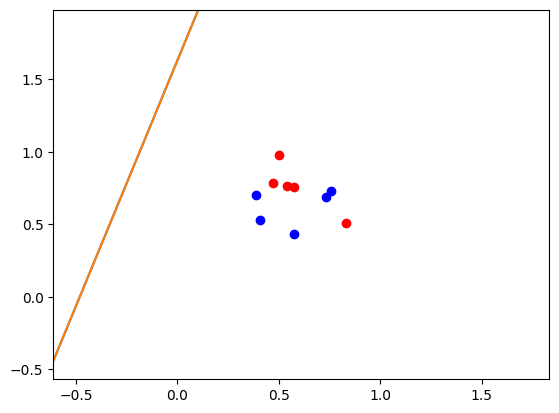

Bobot: [0.0, 1.5008667381456937, -1.3713908712336127, -0.9654755133117638]


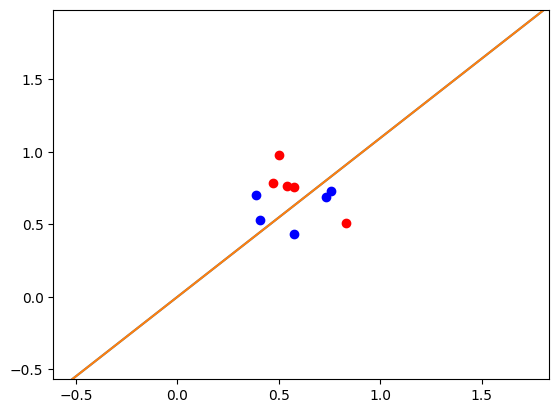

Bobot: [1.0, 1.8881300682403226, -0.6713080217812295, -0.4278026727829334]


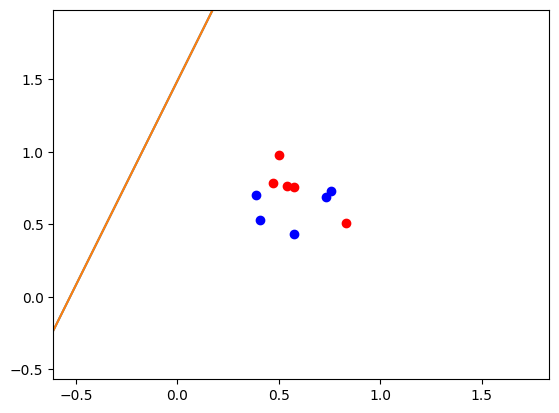

Bobot: [0.0, 1.3896534781946748, -1.6505280043955528, -1.1394618112047183]


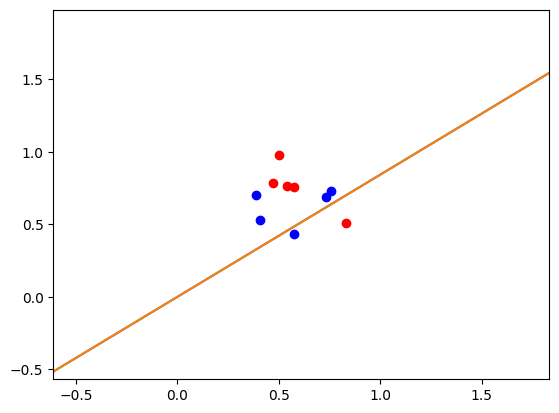


Epoch 6
Bobot: [1.0, 2.1478130220774823, -0.9234165953889449, -0.8166848590908878]


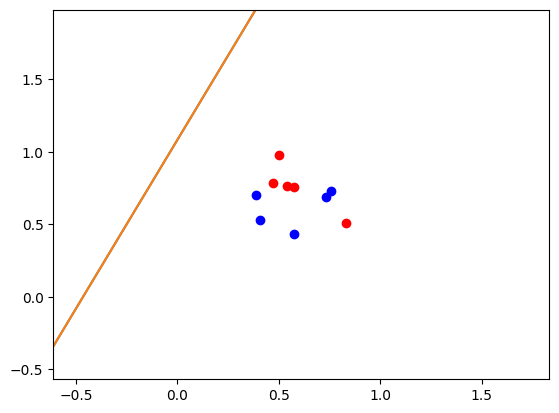

Bobot: [0.0, 1.6786669587824208, -1.706105729909659, -1.4940353725503095]


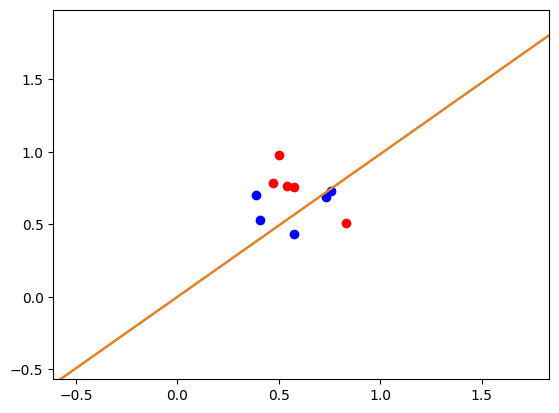

Bobot: [1.0, 2.4100647627980067, -1.014805771106784, -0.9062103146663918]


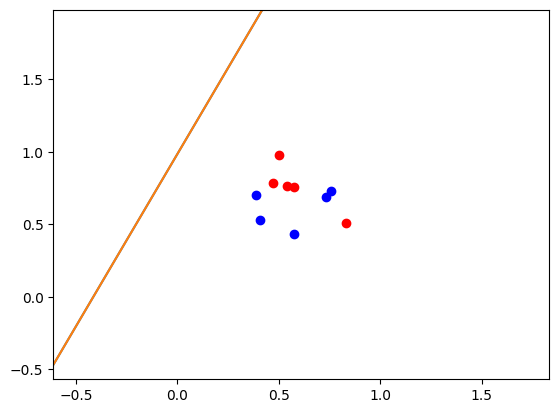

Bobot: [0.0, 1.8352329480066265, -1.7729177775817067, -1.1855328142218606]


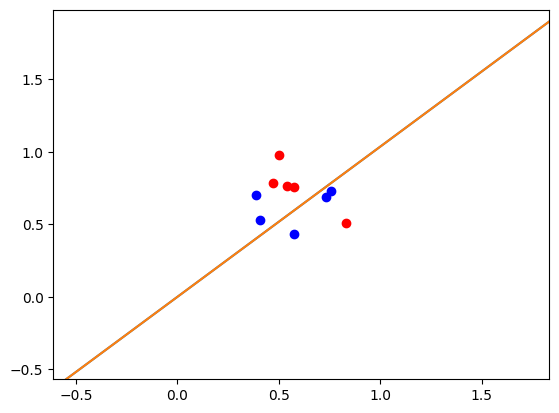

Bobot: [1.0, 2.2224962781012554, -1.0728349281293235, -0.6478599736930302]


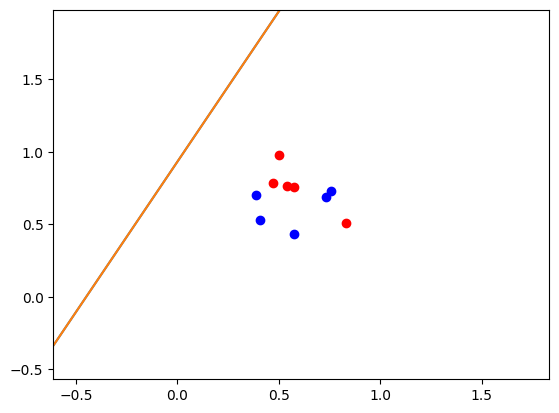

Bobot: [0.0, 1.7240196880556076, -2.0520549107436468, -1.3595191121148151]


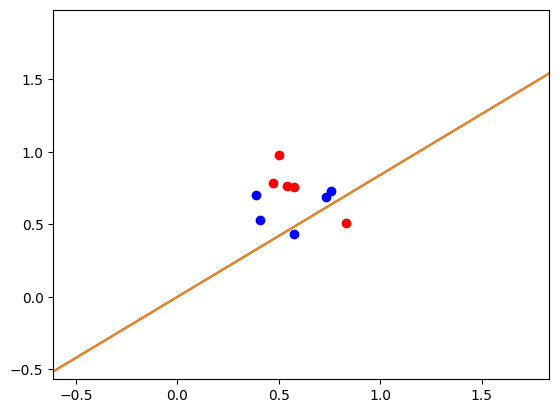


Epoch 7
Bobot: [1.0, 2.482179231938415, -1.3249435017370388, -1.0367421600009847]


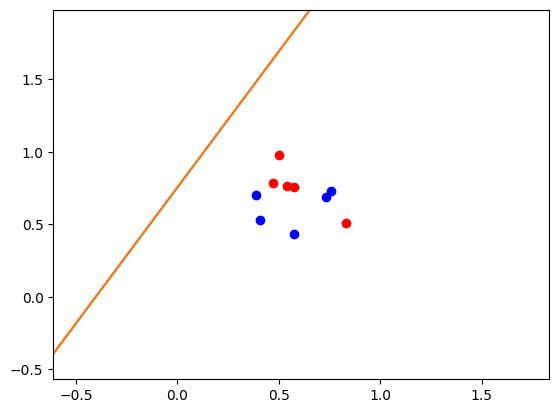

Bobot: [0.0, 2.0130331686433536, -2.107632636257753, -1.7140926734604065]


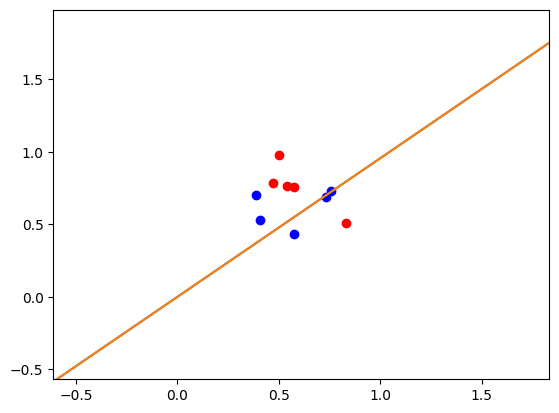

Bobot: [1.0, 2.7444309726589395, -1.416332677454878, -1.1262676155764888]


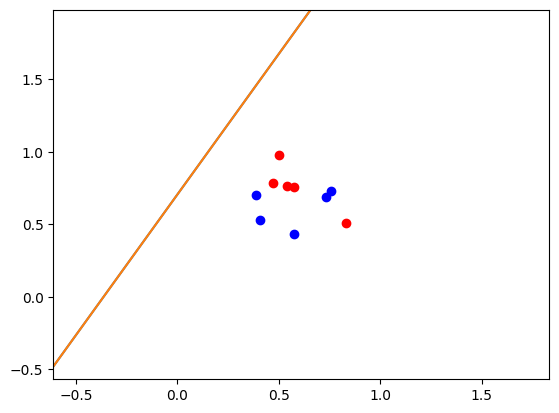

Bobot: [0.0, 2.1695991578675593, -2.1744446839298006, -1.4055901151319576]


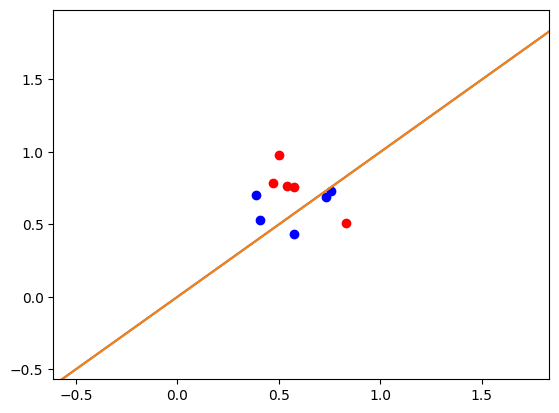

Bobot: [1.0, 2.556862487962188, -1.4743618344774174, -0.8679172746031272]


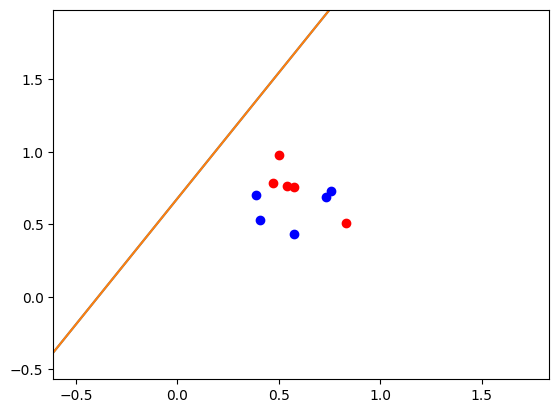

Bobot: [0.0, 2.0583858979165406, -2.4535818170917407, -1.5795764130249121]


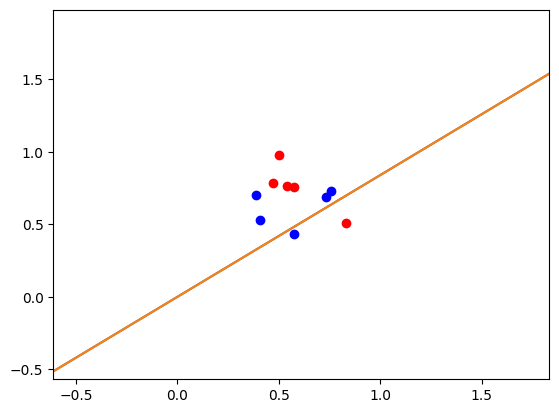


Epoch 8
Bobot: [1.0, 2.816545441799348, -1.7264704080851327, -1.2567994609110817]


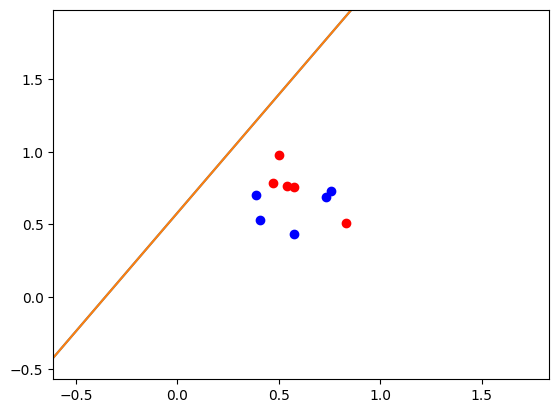

Bobot: [0.0, 2.3473993785042864, -2.509159542605847, -1.9341499743705035]


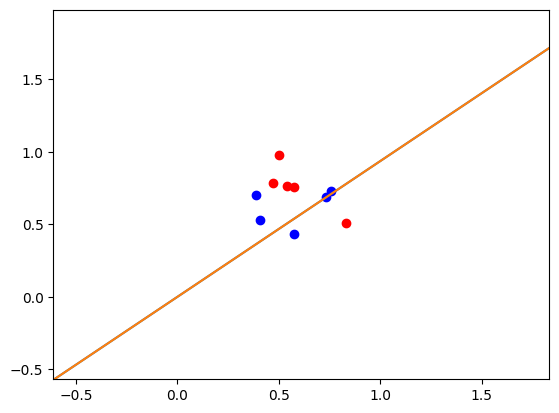

Bobot: [1.0, 3.0787971825198723, -1.8178595838029719, -1.3463249164865858]


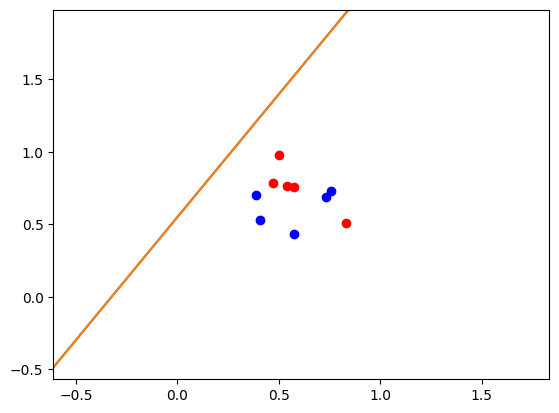

Bobot: [0.0, 2.503965367728492, -2.5759715902778946, -1.6256474160420546]


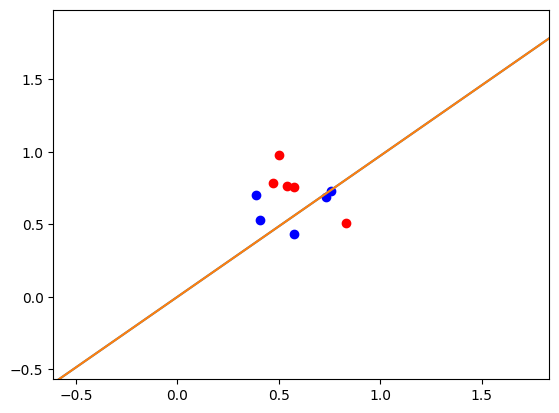

Bobot: [1.0, 2.891228697823121, -1.8758887408255114, -1.0879745755132242]


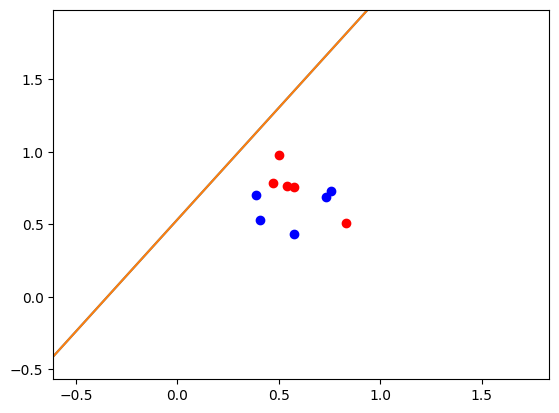


Epoch 9
Bobot: [0.0, 2.058022330217639, -2.38407763306964, -1.9441780685574712]


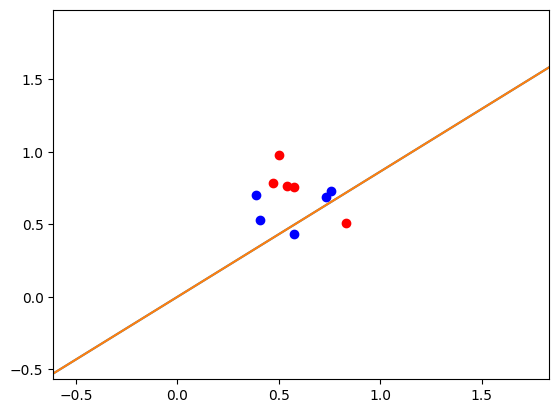

Bobot: [1.0, 2.816181874100446, -1.6569662240630318, -1.6214011164436406]


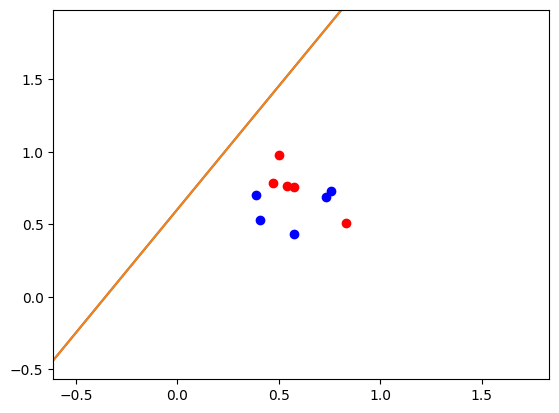

Bobot: [0.0, 2.241350059309066, -2.4150782305379543, -1.9007236159991094]


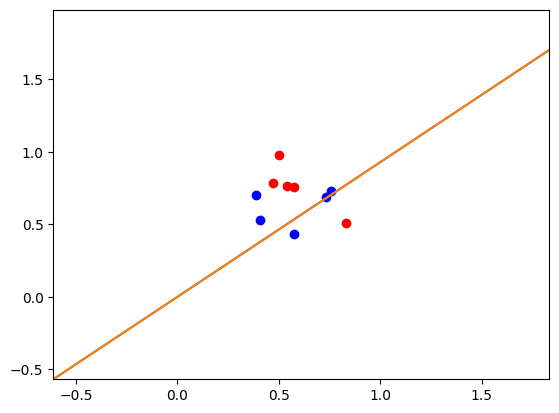

Bobot: [1.0, 2.6286133894036947, -1.7149953810855711, -1.363050775470279]


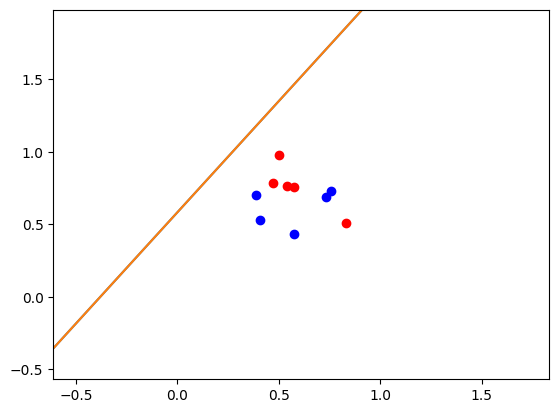


Epoch 10
Bobot: [0.0, 1.7954070217982125, -2.2231842733296996, -2.219254268514526]


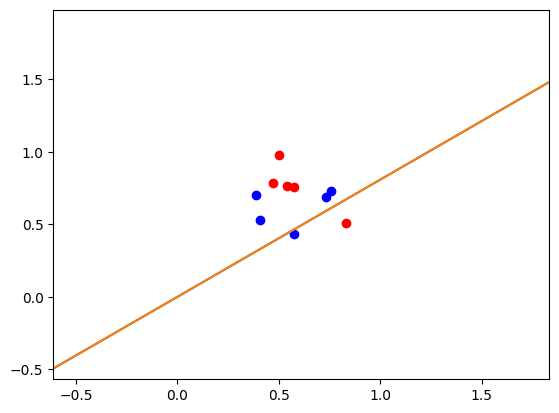

Bobot: [1.0, 2.55356656568102, -1.4960728643230916, -1.8964773164006954]


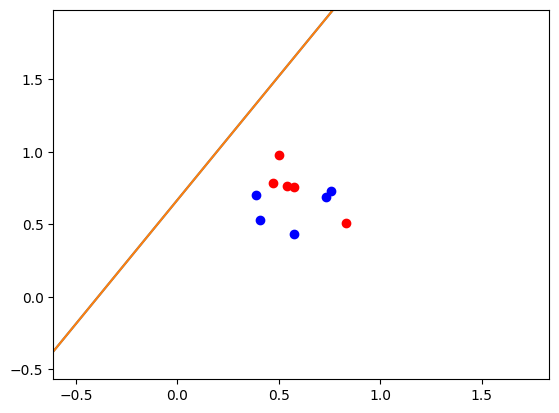

Bobot: [0.0, 1.9787347508896396, -2.254184870798014, -2.1757998159561645]


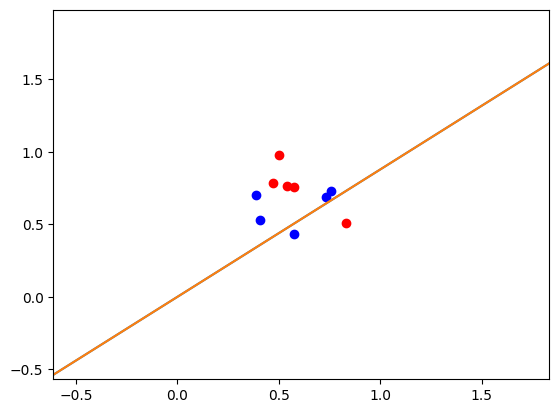

Bobot: [1.0, 2.3659980809842684, -1.554102021345631, -1.638126975427334]


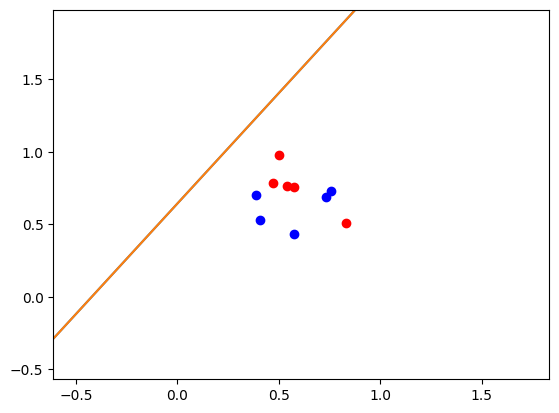

Epochs: 10
Accuracy: 0.484375


In [74]:
w, epoch = percep_fit(X_train, y_train, a=1.0, max_epoch=10, verbose=True, draw=True)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

Dalam eksperimen ini, dua nilai learning rate yang sangat berbeda, yaitu 0.0001 dan 1.0, digunakan untuk melatih model perceptron dengan batasan maksimal 10 epoch. Kedua percobaan menghasilkan akurasi yang sama, yaitu 0.484375, meskipun learning rate yang digunakan berbeda secara signifikan. Hal ini menunjukkan bahwa model belum cukup belajar untuk mencapai akurasi yang lebih tinggi dalam batasan 10 epoch.

Learning rate kecil (0.0001) menyebabkan perubahan bobot yang sangat kecil pada setiap iterasi, sehingga model beradaptasi lebih lambat terhadap kesalahan prediksi. Akibatnya, meskipun stabil, model ini tidak memiliki cukup waktu untuk mengubah bobot secara signifikan sehingga dapat meningkatkan akurasi secara berarti. Di sisi lain, learning rate besar (1.0) menghasilkan pembaruan bobot yang jauh lebih cepat. Namun, perubahan yang terlalu besar ini bisa menyebabkan model melompat terlalu jauh dari solusi optimal (overshooting), sehingga proses pembelajaran tidak stabil dalam jumlah epoch yang terbatas.

Fakta bahwa kedua percobaan menghasilkan akurasi yang sama mengindikasikan bahwa batasan max epoch sebesar 10 menjadi faktor utama yang membatasi performa model. Baik dengan learning rate kecil maupun besar, 10 epoch tidak cukup untuk memperbarui bobot secara signifikan sehingga akurasi bisa meningkat. Oleh karena itu, untuk mencapai akurasi yang lebih tinggi, perlu dipertimbangkan untuk menambah jumlah epoch atau menggunakan nilai learning rate yang lebih moderat, misalnya 0.01 atau 0.1, agar model dapat belajar dengan lebih efektif dan stabil dalam jumlah epoch yang dibatasi.